In [1]:
import os
import sys
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from importlib import reload
import import_ipynb
from sklearn.metrics import precision_score

In [2]:
# adicionar o caminho onde está o ficheiro "funções" ao directorio dos módulos
path = os.getcwd()
sys.path.append(path)

In [3]:
from functions2 import *
import functions2

importing Jupyter notebook from functions2.ipynb


In [4]:
reload(functions2)
from functions2 import *

importing Jupyter notebook from functions2.ipynb


In [5]:
X,y = load_dataset()

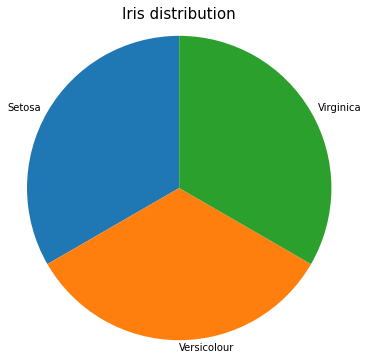

In [6]:
# excercise 2
labels = ["Setosa","Versicolour","Virginica"]

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(y.value_counts(),labels=labels, startangle=90, labeldistance=1.05)
ax.axis('equal')  

ax.set_title("Iris distribution", size=15)
plt.savefig("Iris distribution")

plt.show()

In [7]:
# excercise 2
df_describe=X.describe()
df_describe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\Bruno\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Bruno\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Bruno\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


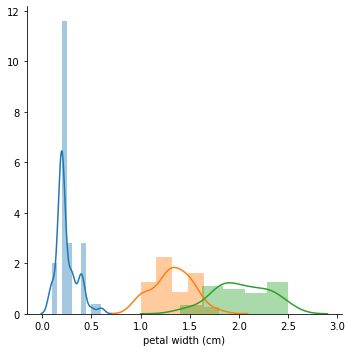

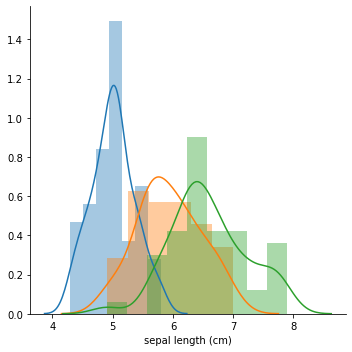

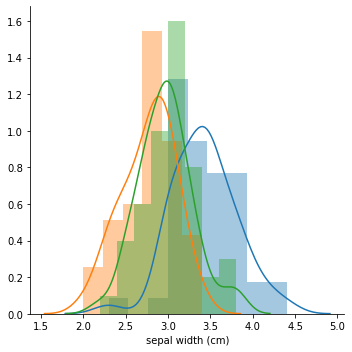

In [8]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
df.head()
    
# X - variáveis usadas para modelar o modelo
X = df.drop(["target"], axis=1)
# y - variavel que se pretende avaliar
y = df["target"]

sns.FacetGrid(df,hue="target",size=5).map(sns.distplot,"petal width (cm)")
sns.FacetGrid(df,hue="target",size=5).map(sns.distplot,"sepal length (cm)")
sns.FacetGrid(df,hue="target",size=5).map(sns.distplot,"sepal width (cm)")

In [9]:
# ex 2.1.1 Train only metrics
X_train = X
y_train = y
#Treinar o modelo de KNN com n=1
knn = KNeighborsClassifier(n_neighbors=1)
#Ajustar o modelo com as entradas de dados de treino às saidas de dados de treino
knn.fit(X_train, y_train)
# Prever os dados de saida para os dados de teste de modo se poder fazer a avaliação do modelo
predictions = knn.predict(X_train)
confusionTO, f1, precision, recall = metricas_exactidao(y_train,predictions)

In [10]:
# ex 2.1.1 Train only confusion matrix
outside_columns = ["","Predicted",""]
outside_index = ["","Actual",""]
inside = ["Setosa","Versicolour","Virginica"]

hier_columns = list(zip(outside_columns, inside))
hier_columns = pd.MultiIndex.from_tuples(hier_columns)

hier_index = list(zip(outside_index, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

pd.DataFrame(confusionTO, columns=hier_columns, index = hier_index)

,,,Predicted,
,,Setosa,Versicolour,Virginica
,Setosa,50,0,0
Actual,Versicolour,0,50,0
,Virginica,0,0,50


In [11]:
# ex 2.1.1 train and test metrics
test_size = 0.3
X_train, X_test, y_train, y_test = data_splitting_TT(X,y,test_size)
#Treinar o modelo de KNN com n=1
knn = KNeighborsClassifier(n_neighbors=1)
#Ajustar o modelo com as entradas de dados de treino às saidas de dados de treino
knn.fit(X_train, y_train)
# Prever os dados de saida para os dados de teste de modo se poder fazer a avaliação do modelo
predictions = knn.predict(X_test)
confusionTT, f1, precision, recall = metricas_exactidao(y_test,predictions)

In [12]:
# ex 2.1.1 train and test division

data_distribution=pd.DataFrame(columns=["Setosa","Versicolor","Virginica"], index=["train","test"])

data_distribution["Setosa"][0]=y_train.value_counts()[0]
data_distribution["Versicolor"][0]=y_train.value_counts()[1]
data_distribution["Virginica"][0]=y_train.value_counts()[2]

data_distribution["Setosa"][1]=y_test.value_counts()[0]
data_distribution["Versicolor"][1]=y_test.value_counts()[1]
data_distribution["Virginica"][1]=y_test.value_counts()[2]

data_distribution

,Setosa,Versicolor,Virginica
train,36,36,33
test,14,14,17


In [13]:
# ex 2.1.1 train and test confusion matrix
outside_columns = ["","Predicted",""]
outside_index = ["","Actual",""]
inside = ["Setosa","Versicolour","Virginica"]

hier_columns = list(zip(outside_columns, inside))
hier_columns = pd.MultiIndex.from_tuples(hier_columns)

hier_index = list(zip(outside_index, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

pd.DataFrame(confusionTT, columns=hier_columns, index = hier_index)

,,,Predicted,
,,Setosa,Versicolour,Virginica
,Setosa,14,0,0
Actual,Versicolour,0,13,1
,Virginica,0,2,15


In [14]:
# ex 2.1.1 cross validation metrics

CV = 10
#kf = data_splitting_K_fold(CV)

precision_k1 = np.zeros(10)
recall_k1 = np.zeros(10)
f1_k1 = np.zeros(10)
conf_matrix_list_of_arrays = []
kf = KFold(n_splits=CV,shuffle=True)
X_array = X.values
y_array = y.values
i = 0;
for train_index, test_index in kf.split(X_array): 
    X_train, X_test = X_array[train_index], X_array[test_index] 
    y_train, y_test = y_array[train_index], y_array[test_index] 
    knn.fit(X_train, y_train) 
    pred = knn.predict(X_test)
    conf_matrix, f1_k1[i], precision_k1[i], recall_k1[i] = metricas_exactidao(y_test,pred)
    conf_matrix_list_of_arrays.append(conf_matrix) 
    i += 1
mean_of_conf_matrix_arrays = sum(conf_matrix_list_of_arrays)/len(conf_matrix_list_of_arrays)
mean_precision_k1 = precision_k1.mean()
mean_recall_k1 = recall_k1.mean()
mean_f1_k1 = f1_k1.mean()

In [15]:
# ex 2.1.1 cross validation metrics
metrics = pd.DataFrame({"mean_precision":mean_precision_k1,"mean_recall":mean_recall_k1,"mean_f1":mean_f1_k1},index=[0])
metrics

,mean_precision,mean_recall,mean_f1
0,0.966683,0.96,0.959873


In [16]:
# ex 2.1.1 cross validation confusion matrix
outside_columns = ["","Predicted",""]
outside_index = ["","Actual",""]
inside = ["Setosa","Versicolour","Virginica"]

hier_columns = list(zip(outside_columns, inside))
hier_columns = pd.MultiIndex.from_tuples(hier_columns)

hier_index = list(zip(outside_index, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

pd.DataFrame(mean_of_conf_matrix_arrays, columns=hier_columns, index = hier_index)

,,,Predicted,
,,Setosa,Versicolour,Virginica
,Setosa,5.0,0.0,0.0
Actual,Versicolour,0.0,4.7,0.3
,Virginica,0.0,0.3,4.7


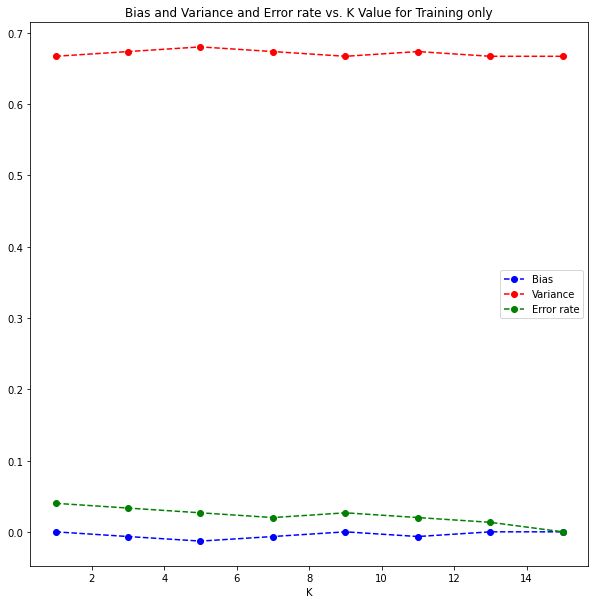

In [17]:
#ex 2.1.2 metrics and 2.1.3 train only
X_train = X
y_train = y
varianceTO = np.zeros(8)
biasTO = np.zeros(8)
error_rateTO = np.zeros(8)
f1TO = np.zeros(8)
precisionTO = np.zeros(8)
recallTO = np.zeros(8)

metrics_TO = pd.DataFrame(columns=["k","precision train","recall train","f1 train"])

for k in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_train)
    confusionTO_k, f1TO[int(np.floor(k/2)-1)], precisionTO[int(np.floor(k/2)-1)], recallTO[int(np.floor(k/2)-1)] = metricas_exactidao(y_train,pred)
    metrics_TO = metrics_TO.append({'k':k,"precision train":precisionTO[int(np.floor(k/2)-1)],"recall train":recallTO[int(np.floor(k/2)-1)],"f1 train":f1TO[int(np.floor(k/2)-1)]}, ignore_index=True)
    
    varianceTO[int(np.floor(k/2)-1)] = np.var(pred) # Where Prediction is a vector variable obtained post the # predict() function of any Classifier.
    SSE = np.mean((np.mean(pred) - y_train)** 2) # Where Y is your dependent variable. # SSE : Sum of squared errors.
    biasTO[int(np.floor(k/2)-1)] = SSE - varianceTO[int(np.floor(k/2)-1)]
    error_rateTO[int(np.floor(k/2)-1)] = np.mean(pred != y_train)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(range(1,16,2), biasTO,  color="blue", linestyle="dashed", marker="o", label='Bias')
ax.plot(range(1,16,2), varianceTO,  color="red", linestyle="dashed", marker="o", label = 'Variance')
ax.plot(range(1,16,2), error_rateTO,  color="green", linestyle="dashed", marker="o", label = 'Error rate')

plt.title('Bias and Variance and Error rate vs. K Value for Training only')
plt.xlabel('K')
plt.legend()
plt.savefig("2_1_3 Bias and Variance and Error rate vs K Value for Training only")

In [18]:
# ex 2.1.2 metrics and 2.1.3 train only
metrics_TO

,k,precision train,recall train,f1 train
0,1.0,1.000000,1.000000,1.000000
1,3.0,0.960000,0.960000,0.960000
2,5.0,0.966787,0.966667,0.966663
3,7.0,0.973825,0.973333,0.973323
4,9.0,0.980125,0.980000,0.979998
5,11.0,0.973333,0.973333,0.973333
6,13.0,0.980125,0.980000,0.979998
7,15.0,0.986667,0.986667,0.986667


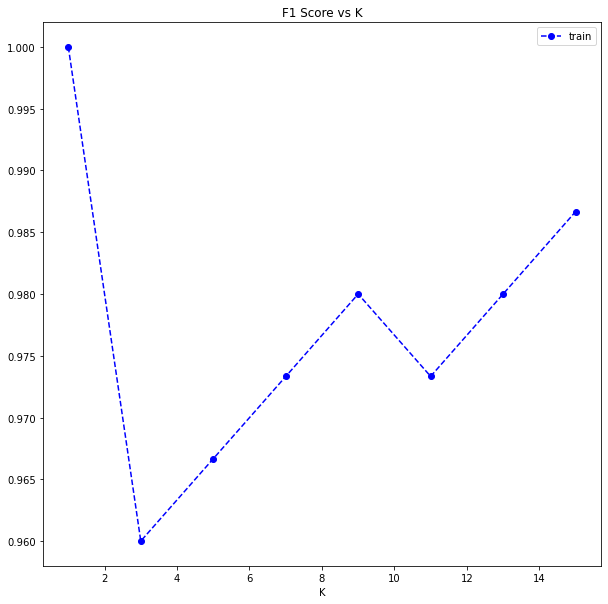

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(range(1,16,2), metrics_TO["f1 train"],  color="blue", linestyle="dashed", marker="o", label='train')

plt.title('F1 Score vs K')
plt.xlabel('K')
plt.legend()

plt.savefig("2_1_3 overfitting_vs_underfitting_TO")

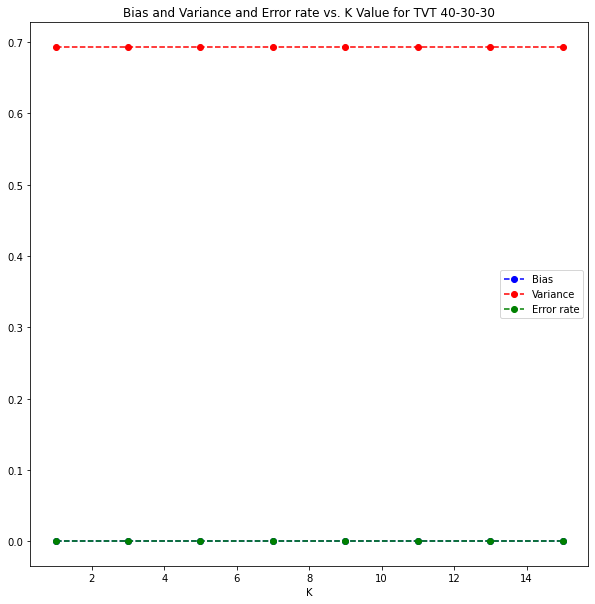

In [20]:
#ex 2.1.2 metrics and 2.1.3 validation and test
validation_size = 0.3
test_size = 0.3
X_train, X_val, X_test, y_train, y_val, y_test = data_splitting_TVT(X,y,validation_size,test_size)
varianceTVT = np.zeros(8)
biasTVT = np.zeros(8)
error_rateTVT = np.zeros(8)
val_accuracyTVT = np.zeros(8)

f1TVT_train = np.zeros(8)
precisionTVT_train = np.zeros(8)
recallTVT_train = np.zeros(8)

f1TVT_test = np.zeros(8)
precisionTVT_test = np.zeros(8)
recallTVT_test = np.zeros(8)

f1TVT_val = np.zeros(8)
precisionTVT_val = np.zeros(8)
recallTVT_val = np.zeros(8)

error_rate_trainTVT = np.zeros(8)
error_rate_valTVT = np.zeros(8)

metrics_TVT = pd.DataFrame(columns=['k',
                                "precision train",
                              "recall train",
                              "f1 train",
                              "precision val",
                              "recall val",
                              "f1 val",
                              "precision test",
                              "recall test",
                              "f1 test"])

for k in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train = knn.predict(X_train)
    error_rate_trainTVT[int(np.floor(k/2)-1)] = np.mean(train != y_train)
    val = knn.predict(X_val)
    error_rate_valTVT[int(np.floor(k/2)-1)] = np.mean(val != y_val)
    pred = knn.predict(X_test)
    
    confusionTO_k1_train, f1TVT_train[int(np.floor(k/2)-1)], precisionTVT_train[int(np.floor(k/2)-1)], recallTVT_train[int(np.floor(k/2)-1)] = metricas_exactidao(y_train,train)
    confusionTO_k1_val, f1TVT_val[int(np.floor(k/2)-1)], precisionTVT_val[int(np.floor(k/2)-1)], recallTVT_val[int(np.floor(k/2)-1)] = metricas_exactidao(y_val,val)
    confusionTO_k1_test, f1TVT_test[int(np.floor(k/2)-1)], precisionTVT_test[int(np.floor(k/2)-1)], recallTVT_test[int(np.floor(k/2)-1)] = metricas_exactidao(y_test,pred)
    
    varianceTVT[int(np.floor(k/2)-1)] = np.var(pred) # Where Prediction is a vector variable obtained post the # predict() function of any Classifier.
    SSE = np.mean((np.mean(pred) - y_test)** 2) # Where Y is your dependent variable. # SSE : Sum of squared errors.
    biasTVT[int(np.floor(k/2)-1)] = SSE - varianceTVT[int(np.floor(k/2)-1)]
    error_rateTVT[int(np.floor(k/2)-1)] = np.mean(pred != y_test)
    
    
    metrics_TVT = metrics_TVT.append({'k':k,
                              "precision train":precisionTVT_train[int(np.floor(k/2)-1)],
                              "recall train":recallTVT_train[int(np.floor(k/2)-1)],
                              "f1 train":f1TVT_train[int(np.floor(k/2)-1)],
                              "precision val":precisionTVT_val[int(np.floor(k/2)-1)],
                              "recall val":recallTVT_val[int(np.floor(k/2)-1)],
                              "f1 val":f1TVT_val[int(np.floor(k/2)-1)],
                              "precision test":precisionTVT_test[int(np.floor(k/2)-1)],
                              "recall test":recallTVT_test[int(np.floor(k/2)-1)],
                              "f1 test":f1TVT_test[int(np.floor(k/2)-1)]}, ignore_index=True)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(range(1,16,2), biasTVT,  color="blue", linestyle="dashed", marker="o", label='Bias')
ax.plot(range(1,16,2), varianceTVT,  color="red", linestyle="dashed", marker="o", label = 'Variance')
ax.plot(range(1,16,2), error_rateTVT,  color="green", linestyle="dashed", marker="o", label = 'Error rate')

plt.title('Bias and Variance and Error rate vs. K Value for TVT 40-30-30')
plt.xlabel('K')
plt.legend()

plt.savefig("2_1_3 Bias and Variance and Error rate vs K Value for TVT 40-30-30")

In [21]:
# ex 2.1.2 train test validation division

data_distribution=pd.DataFrame(columns=["Setosa","Versicolor","Virginica"], index=["train","val","test"])

data_distribution["Setosa"][0]=y_train.value_counts()[0]
data_distribution["Versicolor"][0]=y_train.value_counts()[1]
data_distribution["Virginica"][0]=y_train.value_counts()[2]

data_distribution["Setosa"][1]=y_val.value_counts()[0]
data_distribution["Versicolor"][1]=y_val.value_counts()[1]
data_distribution["Virginica"][1]=y_val.value_counts()[2]

data_distribution["Setosa"][2]=y_test.value_counts()[0]
data_distribution["Versicolor"][2]=y_test.value_counts()[1]
data_distribution["Virginica"][2]=y_test.value_counts()[2]

data_distribution

,Setosa,Versicolor,Virginica
train,17,23,20
val,14,14,17
test,19,13,13


In [22]:
# ex 2.1.2 metrics and 2.1.3 train test val
metrics_TVT

,k,precision train,recall train,f1 train,precision val,recall val,f1 val,precision test,recall test,f1 test
0,1.0,1.000000,1.000000,1.000000,0.934907,0.933333,0.933473,1.0,1.0,1.0
1,3.0,0.950830,0.950000,0.950054,0.979012,0.977778,0.977684,1.0,1.0,1.0
2,5.0,0.950830,0.950000,0.950054,0.960234,0.955556,0.955081,1.0,1.0,1.0
3,7.0,0.966667,0.966667,0.966667,0.979012,0.977778,0.977684,1.0,1.0,1.0
4,9.0,0.966667,0.966667,0.966667,0.960234,0.955556,0.955081,1.0,1.0,1.0
5,11.0,0.950512,0.950000,0.949891,0.960234,0.955556,0.955081,1.0,1.0,1.0
6,13.0,0.955769,0.950000,0.949504,0.914425,0.911111,0.910161,1.0,1.0,1.0
7,15.0,0.943210,0.933333,0.932296,0.934093,0.933333,0.933051,1.0,1.0,1.0


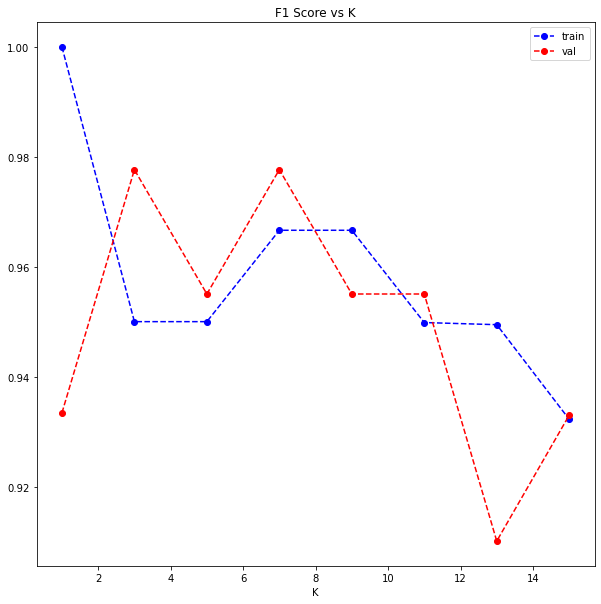

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(range(1,16,2), metrics_TVT["f1 train"],  color="blue", linestyle="dashed", marker="o", label='train')
ax.plot(range(1,16,2), metrics_TVT["f1 val"],  color="red", linestyle="dashed", marker="o", label='val')

plt.title('F1 Score vs K')
plt.xlabel('K')
plt.legend()

plt.savefig("2_1_3 overfitting_vs_underfitting_tvt")

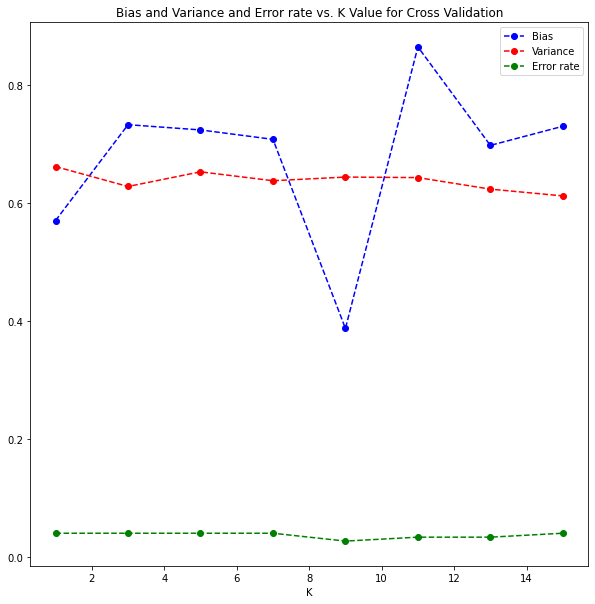

In [24]:
#ex 2.1.2 metrics and 2.1.3 cv
CV = 10
#Escolher um valor K
varianceCV = np.zeros(8)
biasCV = np.zeros(8)
error_rateCV = np.zeros(8)
f1CV = np.zeros(8)
precisionCV = np.zeros(8)
recallCV = np.zeros(8)

metrics_CV = pd.DataFrame(columns=['k',
                                "precision cv",
                              "recall cv",
                              "f1 cv"])

for k in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    precision_k = np.zeros(10)
    recall_k = np.zeros(10)
    f1_k = np.zeros(10)
    variance_k = np.zeros(10)
    bias_k = np.zeros(10)
    error_rate_k = np.zeros(10)
    conf_matrix_list_of_arrays = []
    kf = KFold(n_splits=CV,shuffle=True)
    X_array = X.values
    y_array = y.values
    i = 0;
    for train_index, test_index in kf.split(X_array): 
        X_train, X_test = X_array[train_index], X_array[test_index] 
        y_train, y_test = y_array[train_index], y_array[test_index] 
        knn.fit(X_train, y_train) 
        pred = knn.predict(X_test)
        conf_matrix, f1_k[i], precision_k[i], recall_k[i] = metricas_exactidao(y_test,pred)
        variance_k[i] = np.var(pred) # Where Prediction is a vector variable obtained post the # predict() function of any Classifier.
        
        
        
        
        SSE = np.mean((np.mean(pred) - y_test)** 2) # Where Y is your dependent variable. # SSE : Sum of squared errors.
        bias_k[i] = SSE - variance_k[i]
        error_rate_k[i] = np.mean(pred != y_test)
        conf_matrix_list_of_arrays.append(conf_matrix) 
        i += 1
    mean_of_conf_matrix_arrays = sum(conf_matrix_list_of_arrays)/len(conf_matrix_list_of_arrays)
    precisionCV[int(np.floor(k/2)-1)] = precision_k.mean()
    recallCV[int(np.floor(k/2)-1)] = recall_k.mean()
    f1CV[int(np.floor(k/2)-1)] = f1_k.mean()
    varianceCV[int(np.floor(k/2)-1)] = variance_k.mean()
    biasCV[int(np.floor(k/2)-1)] = SSE - bias_k.mean()
    error_rateCV[int(np.floor(k/2)-1)] = error_rate_k.mean()
    
    metrics_CV = metrics_CV.append({'k':k,"precision cv": precisionCV[int(np.floor(k/2)-1)],"recall cv":recallCV[int(np.floor(k/2)-1)],"f1 cv":f1CV[int(np.floor(k/2)-1)]}, ignore_index=True)
    

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(range(1,16,2), biasCV,  color="blue", linestyle="dashed", marker="o", label='Bias')
ax.plot(range(1,16,2), varianceCV,  color="red", linestyle="dashed", marker="o", label = 'Variance')
ax.plot(range(1,16,2), error_rateCV,  color="green", linestyle="dashed", marker="o", label = 'Error rate')

plt.title('Bias and Variance and Error rate vs. K Value for Cross Validation')
plt.xlabel('K')
plt.legend()

plt.savefig("2_1_3 Bias and Variance and Error rate vs K Value for Cross Validation")

In [25]:
# ex 2.1.2 metrics and 2.1.3 cross validation
metrics_CV

,k,precision cv,recall cv,f1 cv
0,1.0,0.968286,0.960000,0.959549
1,3.0,0.971056,0.960000,0.960828
2,5.0,0.965026,0.960000,0.959034
3,7.0,0.968619,0.960000,0.960317
4,9.0,0.967730,0.960000,0.959941
5,11.0,0.981333,0.973333,0.974705
6,13.0,0.977143,0.966667,0.967680
7,15.0,0.972897,0.966667,0.966519


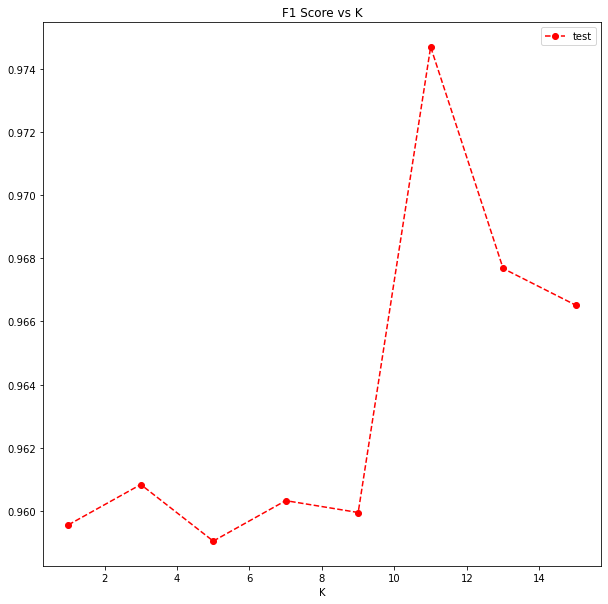

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.plot(range(1,16,2), metrics_CV["f1 cv"],  color="red", linestyle="dashed", marker="o", label='test')

plt.title('F1 Score vs K')
plt.xlabel('K')
plt.legend()

plt.savefig("2_1_3 overfitting_vs_underfitting_CV")

In [27]:
# ex 2.2.1
X_selected = select_features_ReliefF(X,y,4,n_neighbors=10) 
X_selected.columns
X_selected

,petal width (cm),petal length (cm),sepal width (cm),sepal length (cm)
0,0.2,1.4,3.5,5.1
1,0.2,1.4,3.0,4.9
2,0.2,1.3,3.2,4.7
3,0.2,1.5,3.1,4.6
4,0.2,1.4,3.6,5.0
...,...,...,...,...
145,2.3,5.2,3.0,6.7
146,1.9,5.0,2.5,6.3
147,2.0,5.2,3.0,6.5
148,2.3,5.4,3.4,6.2


<Figure size 432x288 with 0 Axes>

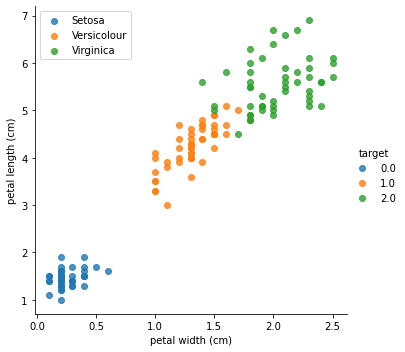

In [28]:
# ex 2.2.1 best 2 features
print_iris=X_selected
print_iris["target"]=y
print_iris

plt.figure()
sns.lmplot(data=print_iris,x="petal width (cm)",y="petal length (cm)",hue="target", fit_reg=False)
labels = ["Setosa","Versicolour","Virginica"]
plt.legend(labels)
plt.savefig("2_2_1 Best 2 features")

In [29]:
# ex 2.2.1 best model
X,y = load_dataset()

param_grid = {'k':[1,3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
param_features_test = pd.DataFrame(columns=["num_features","k","weights","metric","f1 train","f1 test"])

for i in range(1,5):
    X_selected = select_features_ReliefF(X,y,i,n_neighbors=10)  
    X_train, X_test, y_train, y_test = data_splitting_TT(X_selected,y,0.3)
    for k in param_grid['k']:
        for w in param_grid['weights']:
            for m in param_grid['metric']:
                knn = KNeighborsClassifier(n_neighbors=k)
        
                knn.fit(X_train, y_train) 
                pred = knn.predict(X_test)
                train=knn.predict(X_train)
                _, f1_test, precision_test,_ = metricas_exactidao(y_test,pred)
                _, f1_train, precision_train,_ = metricas_exactidao(y_train,train)

                param_features_test = param_features_test.append({'num_features':i,
                                                                  'k': k,'weights':w,'metric':m,
                                                                  'f1 train':f1_train,'f1 test':f1_test}, ignore_index=True)

In [30]:
# ex 2.2.1 best model
param_features_test.sort_values(by="f1 test",ascending=False).head(15)

,num_features,k,weights,metric,f1 train,f1 test
104,4,5,uniform,euclidean,0.971441,0.977684
105,4,5,uniform,manhattan,0.971441,0.977684
114,4,9,distance,euclidean,0.980952,0.977684
113,4,9,uniform,manhattan,0.980952,0.977684
112,4,9,uniform,euclidean,0.980952,0.977684
111,4,7,distance,manhattan,0.980952,0.977684
110,4,7,distance,euclidean,0.980952,0.977684
109,4,7,uniform,manhattan,0.980952,0.977684
108,4,7,uniform,euclidean,0.980952,0.977684
107,4,5,distance,manhattan,0.971441,0.977684


In [31]:
# ex 2.2.3
param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
param_features_val = pd.DataFrame(columns=["num_features","n_neighbors","weights","metric","precision train","f1 train",
                                          "precision val","f1 val","precision test","f1 test"])

validation_size = 0.3
test_size = 0.3

for i in range(1,5):
    X_selected = select_features_ReliefF(X,y,i,n_neighbors=10)        
    X_train, X_val, X_test, y_train, y_val, y_test = data_splitting_TVT(X_selected,y,validation_size,test_size)
    for k in param_grid['n_neighbors']:
        for w in param_grid['weights']:
            for m in param_grid['metric']:
                knn = KNeighborsClassifier(n_neighbors=k)
                knn.fit(X_train, y_train) 
                train = knn.predict(X_train)
                val = knn.predict(X_val)
                test = knn.predict(X_test)
                
                _, f1_train, precision_train, _ = metricas_exactidao(y_train,train)
                _, f1_val, precision_val, _ = metricas_exactidao(y_val,val)
                _, f1_test, precision_test, _ = metricas_exactidao(y_test,test)
 
                param_features_val = param_features_val.append({'num_features':i,'n_neighbors': k,'weights':w,'metric':m,
                                                                'f1 train':f1_train,'precision train':precision_train,
                                                               'f1 val':f1_val,'precision val':precision_val,
                                                               'f1 test':f1_test,'precision test':precision_test}, ignore_index=True)

In [32]:
# ex 2.2.3 and 2.2.4 all features and best features
param_features_val.sort_values(by="f1 val",ascending=False).head(15)

,num_features,n_neighbors,weights,metric,precision train,f1 train,precision val,f1 val,precision test,f1 test
108,4,7,uniform,euclidean,0.966667,0.966667,0.979012,0.977684,1.0,1.0
100,4,3,uniform,euclidean,0.950830,0.950054,0.979012,0.977684,1.0,1.0
101,4,3,uniform,manhattan,0.950830,0.950054,0.979012,0.977684,1.0,1.0
102,4,3,distance,euclidean,0.950830,0.950054,0.979012,0.977684,1.0,1.0
103,4,3,distance,manhattan,0.950830,0.950054,0.979012,0.977684,1.0,1.0
111,4,7,distance,manhattan,0.966667,0.966667,0.979012,0.977684,1.0,1.0
110,4,7,distance,euclidean,0.966667,0.966667,0.979012,0.977684,1.0,1.0
109,4,7,uniform,manhattan,0.966667,0.966667,0.979012,0.977684,1.0,1.0
92,3,15,uniform,euclidean,0.935481,0.932968,0.960234,0.955081,1.0,1.0
48,2,9,uniform,euclidean,0.966667,0.966667,0.960234,0.955081,1.0,1.0


<Figure size 432x288 with 0 Axes>

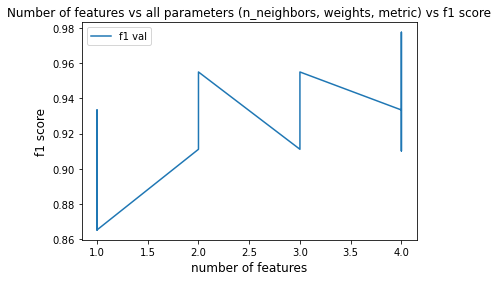

In [34]:
# ex 2.2.2

plt.figure()
param_features_val.plot(x="num_features",y="f1 val")

plt.title('Number of features vs all parameters (n_neighbors, weights, metric) vs f1 score')
plt.ylabel('f1 score',size=12)
plt.xlabel('number of features',size=12)
plt.legend()
plt.savefig("2_2_2 Number of features vs all parameters vs f1 score")

In [35]:
# ex 2.2.1 best model
X,y = load_dataset()

param_grid = {'k':[1,3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
param_features_test = pd.DataFrame(columns=["num_features","k","weights","metric","f1 train","f1 test"])

for i in range(1,5):
    X_selected = select_features_ReliefF(X,y,i,n_neighbors=10)  
    X_train, X_test, y_train, y_test = data_splitting_TT(X_selected,y,0.3)
    for k in param_grid['k']:
        for w in param_grid['weights']:
            for m in param_grid['metric']:
                knn = KNeighborsClassifier(n_neighbors=k)
        
                knn.fit(X_train, y_train) 
                pred = knn.predict(X_test)
                train=knn.predict(X_train)
                _, f1_test, precision_test,_ = metricas_exactidao(y_test,pred)
                _, f1_train, precision_train,_ = metricas_exactidao(y_train,train)

                param_features_test = param_features_test.append({'num_features':i,
                                                                  'k': k,'weights':w,'metric':m,
                                                                  'f1 train':f1_train,'f1 test':f1_test}, ignore_index=True)

In [36]:
#https://towardsdatascience.com/feature-importance-and-forward-feature-selection-752638849962

#2.3.1 best model
X,y = load_dataset()
X_train, X_test, y_train, y_test = data_splitting_TT(X,y,0.3)

param_grid = {'k':[1,3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
param_features_test = pd.DataFrame(columns=["num_feat","best feat","k","weights","metric","f1 train","f1 test"])

for k in param_grid['k']:
    for w in param_grid['weights']:
        for m in param_grid['metric']:
            
            ffs_test,f1_test=forward_feature_selection(X_train, X_test, y_train, y_test, 4,k,m,w)
            best_test=max(f1_test)
            best_idx_test=np.argmax(f1_test)
            best_features_test=ffs_test[:best_idx_test+1]
            
            ffs_train,f1_train=forward_feature_selection(X_train, X_train, y_train, y_train, 4,k,m,w)
            best_train=max(f1_train)
            best_idx_train=np.argmax(f1_train)
            best_features_train=ffs_train[:best_idx_train+1]
            
            
            param_features_test = param_features_test.append({'num_feat':len(best_features_test),'best feat':best_features_test,'k':k,'weights':w,'metric':m,'f1 train':best_train,'f1 test':best_test}, ignore_index=True)
        

In [37]:
# ex 2.3.1 best model
param_features_test.sort_values(by="f1 test",ascending=False).head(15)

,num_feat,best feat,k,weights,metric,f1 train,f1 test
16,2,"[petal length (cm), sepal length (cm)]",9,uniform,euclidean,0.980952,0.977778
8,3,"[petal length (cm), sepal length (cm), sepal w...",5,uniform,euclidean,0.980952,0.977778
18,2,"[petal length (cm), sepal length (cm)]",9,distance,euclidean,1.000000,0.977778
14,3,"[petal length (cm), sepal length (cm), sepal w...",7,distance,euclidean,1.000000,0.977778
12,4,"[petal length (cm), sepal length (cm), sepal w...",7,uniform,euclidean,0.980952,0.977778
11,3,"[petal length (cm), sepal length (cm), sepal w...",5,distance,manhattan,1.000000,0.977778
22,2,"[petal length (cm), sepal length (cm)]",11,distance,euclidean,1.000000,0.977778
9,3,"[petal length (cm), sepal length (cm), sepal w...",5,uniform,manhattan,0.980952,0.977778
10,3,"[petal length (cm), sepal length (cm), sepal w...",5,distance,euclidean,1.000000,0.977778
7,2,"[petal length (cm), sepal length (cm)]",3,distance,manhattan,1.000000,0.977778


<Figure size 432x288 with 0 Axes>

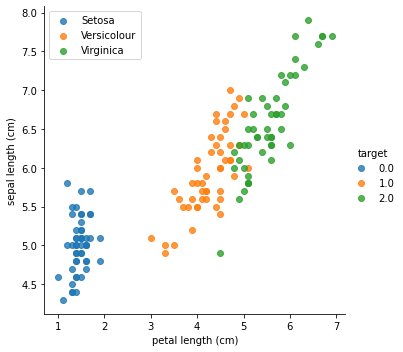

In [38]:
# ex 2.3.1 best 2 features
print_iris=X_selected
print_iris["target"]=y
print_iris

plt.figure()
sns.lmplot(data=print_iris,x="petal length (cm)",y="sepal length (cm)",hue="target", fit_reg=False)
labels = ["Setosa","Versicolour","Virginica"]
plt.legend(labels)
plt.savefig("2_3_1 Best 2 features")

In [39]:
#2.3.3
X,y = load_dataset()
validation_size = 0.3
test_size = 0.3
X_train, X_val, X_test, y_train, y_val, y_test = data_splitting_TVT(X,y,validation_size,test_size)

param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
param_features_val = pd.DataFrame(columns=["num_feat","best feat","k","weights","metric","f1 train","f1 val","f1 test"])

for k in param_grid['n_neighbors']:
    for w in param_grid['weights']:
        for m in param_grid['metric']:
            
            ffs_val,f1_val=forward_feature_selection(X_train, X_val, y_train, y_val, 4,k,m,w)
            best_val=max(f1_val)
            best_idx_val=np.argmax(f1_val)
            best_features_val=ffs_val[:best_idx_val+1]
            
            ffs_test,f1_test=forward_feature_selection(X_train, X_test, y_train, y_test, 4,k,m,w)
            best_test=max(f1_test)
            best_idx_test=np.argmax(f1_test)
            best_features_test=ffs_test[:best_idx_test+1]
            
            ffs_train,f1_train=forward_feature_selection(X_train, X_train, y_train, y_train, 4,k,m,w)
            best_train=max(f1_train)
            best_idx_train=np.argmax(f1_train)
            best_features_train=ffs_train[:best_idx_train+1]
            
            
            param_features_val = param_features_val.append({'num_feat':len(best_features_val),'best feat':best_features_val,'k':k,'weights':w,'metric':m,'f1 train':best_train,'f1 val':best_val,'f1 test':best_test}, ignore_index=True)
        

In [40]:
#2.3.3 and 2.3.4 all features and best features
param_features_val.sort_values(by="f1 val",ascending=False).head(12)

,num_feat,best feat,k,weights,metric,f1 train,f1 val,f1 test
14,4,"[petal width (cm), sepal length (cm), petal le...",7,distance,euclidean,1.000000,0.977778,1.0
20,2,"[petal length (cm), sepal width (cm)]",11,uniform,euclidean,0.983333,0.977778,1.0
4,4,"[petal length (cm), sepal length (cm), sepal w...",3,uniform,euclidean,0.983333,0.977778,1.0
6,4,"[petal width (cm), sepal length (cm), petal le...",3,distance,euclidean,1.000000,0.977778,1.0
8,3,"[petal length (cm), sepal length (cm), petal w...",5,uniform,euclidean,0.983333,0.977778,1.0
24,2,"[petal length (cm), sepal width (cm)]",13,uniform,euclidean,0.983333,0.977778,1.0
10,3,"[petal width (cm), sepal length (cm), petal le...",5,distance,euclidean,1.000000,0.977778,1.0
12,4,"[petal length (cm), sepal length (cm), sepal w...",7,uniform,euclidean,0.983333,0.977778,1.0
16,2,"[petal length (cm), petal width (cm)]",9,uniform,euclidean,0.983333,0.955556,1.0
23,4,"[petal width (cm), sepal length (cm), sepal wi...",11,distance,manhattan,1.000000,0.955556,1.0


<Figure size 432x288 with 0 Axes>

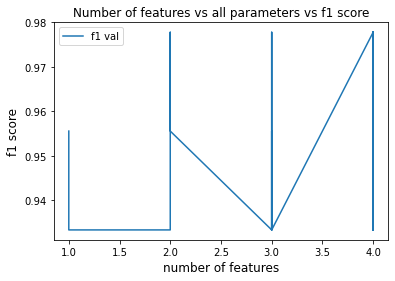

In [41]:
#2.3.2

plt.figure()
param_features_val.sort_values(by="num_feat").plot(x="num_feat",y="f1 val")

plt.title('Number of features vs all parameters vs f1 score')
plt.ylabel('f1 score',size=12)
plt.xlabel('number of features',size=12)
plt.legend()

plt.savefig("2_3_2 Number of features vs all parameters vs f1 score")

In [42]:
# ex 2.4
X_reduced, y_reduced = dataset_reduced()

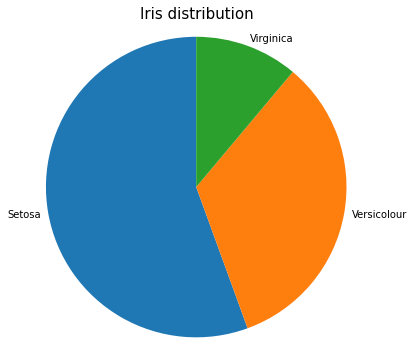

In [43]:
# ex 2.4
labels = ["Setosa","Versicolour","Virginica"]

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(y_reduced.value_counts(),labels=labels, startangle=90, labeldistance=1.05)
ax.axis('equal')  

ax.set_title("Iris distribution", size=15)
plt.savefig("Iris distribution")

plt.show()

In [44]:
#2.4.1 best model
X_train, X_test, y_train, y_test = data_splitting_TT(X_reduced,y_reduced,0.3)

param_grid = {'k':[1,3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
param_features_test = pd.DataFrame(columns=["num_feat","best feat","k","weights","metric","f1 train","f1 test"])

for k in param_grid['k']:
    for w in param_grid['weights']:
        for m in param_grid['metric']:
            
            ffs_test,f1_test=forward_feature_selection(X_train, X_test, y_train, y_test, 4,k,m,w)
            best_test=max(f1_test)
            best_idx_test=np.argmax(f1_test)
            best_features_test=ffs_test[:best_idx_test+1]
            
            ffs_train,f1_train=forward_feature_selection(X_train, X_train, y_train, y_train, 4,k,m,w)
            best_train=max(f1_train)
            best_idx_train=np.argmax(f1_train)
            best_features_train=ffs_train[:best_idx_train+1]
            
            
            param_features_test = param_features_test.append({'num_feat':len(best_features_test),'best feat':best_features_test,'k':k,'weights':w,'metric':m,'f1 train':best_train,'f1 test':best_test}, ignore_index=True)

In [45]:
# ex 2.4.1 best model
param_features_test.sort_values(by="f1 test",ascending=False).head(15)

,num_feat,best feat,k,weights,metric,f1 train,f1 test
0,1,[petal length (cm)],1,uniform,euclidean,1.000000,1.0
1,1,[petal length (cm)],1,uniform,manhattan,1.000000,1.0
30,1,[petal length (cm)],15,distance,euclidean,1.000000,1.0
29,1,[petal length (cm)],15,uniform,manhattan,0.968254,1.0
28,1,[petal length (cm)],15,uniform,euclidean,0.968254,1.0
27,1,[petal length (cm)],13,distance,manhattan,1.000000,1.0
26,1,[petal length (cm)],13,distance,euclidean,1.000000,1.0
25,1,[petal length (cm)],13,uniform,manhattan,0.968254,1.0
24,1,[petal length (cm)],13,uniform,euclidean,0.968254,1.0
23,1,[petal length (cm)],11,distance,manhattan,1.000000,1.0


In [46]:
# ex 2.4.1 train and test division

data_distribution=pd.DataFrame(columns=["Setosa","Versicolor","Virginica"], index=["train","test"])

data_distribution["Setosa"][0]=y_train.value_counts()[0]
data_distribution["Versicolor"][0]=y_train.value_counts()[1]
data_distribution["Virginica"][0]=y_train.value_counts()[2]

data_distribution["Setosa"][1]=y_test.value_counts()[0]
data_distribution["Versicolor"][1]=y_test.value_counts()[1]
data_distribution["Virginica"][1]=y_test.value_counts()[2]

data_distribution

,Setosa,Versicolor,Virginica
train,28,26,9
test,22,4,1


In [47]:
#2.4.3
X_reduced,y_reduced = dataset_reduced()
validation_size = 0.3
test_size = 0.3
X_train, X_val, X_test, y_train, y_val, y_test = data_splitting_TVT(X_reduced,y_reduced,validation_size,test_size)

param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
param_features_val = pd.DataFrame(columns=["num_feat","best feat","k","weights","metric","f1 train","f1 val","f1 test"])

for k in param_grid['n_neighbors']:
    for w in param_grid['weights']:
        for m in param_grid['metric']:
            
            ffs_val,f1_val=forward_feature_selection(X_train, X_val, y_train, y_val, 4,k,m,w)
            best_val=max(f1_val)
            best_idx_val=np.argmax(f1_val)
            best_features_val=ffs_val[:best_idx_val+1]
            
            ffs_test,f1_test=forward_feature_selection(X_train, X_test, y_train, y_test, 4,k,m,w)
            best_test=max(f1_test)
            best_idx_test=np.argmax(f1_test)
            best_features_test=ffs_test[:best_idx_test+1]
            
            ffs_train,f1_train=forward_feature_selection(X_train, X_train, y_train, y_train, 4,k,m,w)
            best_train=max(f1_train)
            best_idx_train=np.argmax(f1_train)
            best_features_train=ffs_train[:best_idx_train+1]
            
            
            param_features_val = param_features_val.append({'num_feat':len(best_features_val),'best feat':best_features_val,'k':k,'weights':w,'metric':m,'f1 train':best_train,'f1 val':best_val,'f1 test':best_test}, ignore_index=True)
        

In [48]:
# ex 2.4.3 train test validation division

data_distribution=pd.DataFrame(columns=["Setosa","Versicolor","Virginica"], index=["train","val","test"])

data_distribution["Setosa"][0]=y_train.value_counts()[0]
data_distribution["Versicolor"][0]=y_train.value_counts()[1]
data_distribution["Virginica"][0]=y_train.value_counts()[2]

data_distribution["Setosa"][1]=y_val.value_counts()[0]
data_distribution["Versicolor"][1]=y_val.value_counts()[1]
data_distribution["Virginica"][1]=y_val.value_counts()[2]

data_distribution["Setosa"][2]=y_test.value_counts()[0]
data_distribution["Versicolor"][2]=y_test.value_counts()[1]
data_distribution["Virginica"][2]=y_test.value_counts()[2]

data_distribution

,Setosa,Versicolor,Virginica
train,18,14,3
val,16,5,6
test,16,11,1


In [49]:
#2.4.3 and 2.4.4 all features and best features
param_features_val.sort_values(by="f1 val",ascending=False).head(12)

,num_feat,best feat,k,weights,metric,f1 train,f1 val,f1 test
0,2,"[petal length (cm), sepal length (cm)]",1,uniform,euclidean,1.000000,1.000000,1.0
2,2,"[petal length (cm), sepal length (cm)]",1,distance,euclidean,1.000000,1.000000,1.0
3,2,"[petal length (cm), sepal length (cm)]",1,distance,manhattan,1.000000,1.000000,1.0
1,2,"[petal length (cm), sepal length (cm)]",1,uniform,manhattan,1.000000,1.000000,1.0
9,1,[petal length (cm)],5,uniform,manhattan,0.971429,0.962963,1.0
15,1,[petal length (cm)],7,distance,manhattan,1.000000,0.962963,1.0
14,1,[petal length (cm)],7,distance,euclidean,1.000000,0.962963,1.0
11,1,[petal length (cm)],5,distance,manhattan,1.000000,0.962963,1.0
10,1,[petal length (cm)],5,distance,euclidean,1.000000,0.962963,1.0
8,1,[petal length (cm)],5,uniform,euclidean,0.971429,0.962963,1.0


<Figure size 432x288 with 0 Axes>

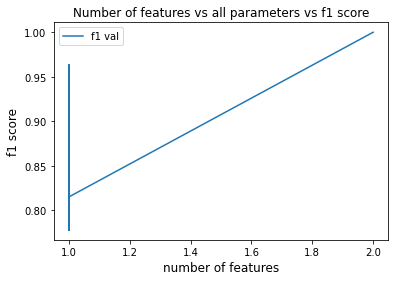

In [50]:
#2.4.2

plt.figure()
param_features_val.sort_values(by="num_feat").plot(x="num_feat",y="f1 val")

plt.title('Number of features vs all parameters vs f1 score')
plt.ylabel('f1 score',size=12)
plt.xlabel('number of features',size=12)
plt.legend()

plt.savefig("2_4_2 Number of features vs all parameters vs f1 score")

In [51]:
# ex 3
features_data = pd.read_csv("features_actividades_400.csv")
features_data["activity"].value_counts()
features = features_data["activity"].unique()
for f in range(0, len(features)):
    feature = features[f]
    if features_data["activity"].value_counts()[feature] / len(features_data["activity"]) < 0.05:
        features_data = features_data[features_data["activity"] != feature].reset_index(drop=True)
y = features_data["activity"]
X = features_data.drop(["activity","Unnamed: 0"],axis=1)
#X_selected["Unnamed: 0"] = X["Unnamed: 0"]
#validation_size = 0.3
#test_size = 0.3
#X_selected = select_features_ReliefF_human(X,y,47,n_neighbors=10)  
#X_selected["Unnamed: 0"] = X["Unnamed: 0"]
#X_train, X_val, X_test, y_train, y_val, y_test = data_splitting_TVT(X_selected,y,validation_size,test_size)

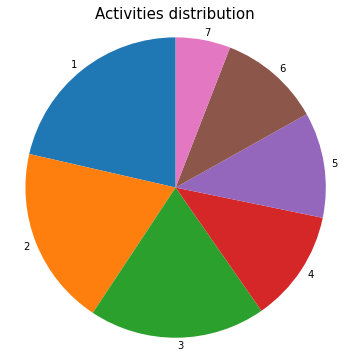

In [52]:
# excercise 3
labels = ["1","2","3","4","5","6","7"]

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(y.value_counts(),labels=labels, startangle=90, labeldistance=1.05)
ax.axis('equal')  

ax.set_title("Activities distribution", size=15)
plt.savefig("Activities distribution")

plt.show()

In [53]:
# ex 3.
#df_transformed = transformed_dataset()
#window_size = np.len(df_transformed)/50
#features_data = features_dataset_activities(40000,"acc")

#y = features_data["activity"]
#X = features_data.drop("activity",axis=1)

In [54]:
# ex 3.1.1 train only metrics

X_train = X
y_train = y
#Treinar o modelo de KNN com n=1
knn = KNeighborsClassifier(n_neighbors=1)
#Ajustar o modelo com as entradas de dados de treino às saidas de dados de treino
knn.fit(X_train, y_train)
# Prever os dados de saida para os dados de teste de modo se poder fazer a avaliação do modelo
predictions = knn.predict(X_train)
confusionTO, f1, precision, recall = metricas_exactidao(y_train,predictions)

In [55]:
# ex 3.1.1 Train only confusion matrix
outside_columns = ["","","","Pred","","",""]
outside_index = ["","","","Actual","","",""]
inside = ["1","2","3","4","5","6","7"]

hier_columns = list(zip(outside_columns, inside))
hier_columns = pd.MultiIndex.from_tuples(hier_columns)

hier_index = list(zip(outside_index, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

pd.DataFrame(confusionTO, columns=hier_columns, index = hier_index)

Pred               
            1    2    3    4    5    6    7
       1  788    0    0    0    0    0    0
       2    0  418    0    0    0    0    0
       3    0    0  404    0    0    0    0
Actual 4    0    0    0  698    0    0    0
       5    0    0    0    0  710    0    0
       6    0    0    0    0    0  445    0
       7    0    0    0    0    0    0  217

In [56]:
# ex 3.1.1 train test

test_size = 0.3
X_train, X_test, y_train, y_test = data_splitting_TT(X,y,test_size)
#Treinar o modelo de KNN com n=1
knn = KNeighborsClassifier(n_neighbors=1)
#Ajustar o modelo com as entradas de dados de treino às saidas de dados de treino
knn.fit(X_train, y_train)
# Prever os dados de saida para os dados de teste de modo se poder fazer a avaliação do modelo
predictions = knn.predict(X_test)
confusionTT, f1, precision, recall = metricas_exactidao(y_test,predictions)

In [57]:
# ex 3.1.1 Train test confusion matrix
outside_columns = ["","","","Pred","","",""]
outside_index = ["","","","Actual","","",""]
inside = ["1","2","3","4","5","6","7"]

hier_columns = list(zip(outside_columns, inside))
hier_columns = pd.MultiIndex.from_tuples(hier_columns)

hier_index = list(zip(outside_index, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

pd.DataFrame(confusionTT, columns=hier_columns, index = hier_index)

Pred             
            1    2    3    4    5   6   7
       1  226    4    3    6    2   2   2
       2    0  103   13    1    0   1   0
       3    1   12  104    0    0   0   0
Actual 4    4    0    0   89   76  28  12
       5    5    0    0   77  102  28   6
       6    1    0    0   31   52  39  12
       7    1    1    2    9   16  16  17

In [58]:
# ex 3.1.1 train and test division

data_distribution=pd.DataFrame(columns=["1","2","3","4","5","6","7"], index=["train","test"])

data_distribution["1"][0]=y_train.value_counts()[1]
data_distribution["2"][0]=y_train.value_counts()[2]
data_distribution["3"][0]=y_train.value_counts()[3]
data_distribution["4"][0]=y_train.value_counts()[4]
data_distribution["5"][0]=y_train.value_counts()[5]
data_distribution["6"][0]=y_train.value_counts()[6]
data_distribution["7"][0]=y_train.value_counts()[7]

data_distribution["1"][1]=y_test.value_counts()[1]
data_distribution["2"][1]=y_test.value_counts()[2]
data_distribution["3"][1]=y_test.value_counts()[3]
data_distribution["4"][1]=y_test.value_counts()[4]
data_distribution["5"][1]=y_test.value_counts()[5]
data_distribution["6"][1]=y_test.value_counts()[6]
data_distribution["7"][1]=y_test.value_counts()[7]

data_distribution

,1,2,3,4,5,6,7
train,543,300,287,489,492,310,155
test,245,118,117,209,218,135,62


In [59]:
# ex 3.1.1 cross validation metrics

CV = 10
#kf = data_splitting_K_fold(CV)

precision_k1 = np.zeros(10)
recall_k1 = np.zeros(10)
f1_k1 = np.zeros(10)
conf_matrix_list_of_arrays = []
kf = KFold(n_splits=CV,shuffle=True)
X_array = X.values
y_array = y.values
i = 0;
for train_index, test_index in kf.split(X_array): 
    X_train, X_test = X_array[train_index], X_array[test_index] 
    y_train, y_test = y_array[train_index], y_array[test_index] 
    knn.fit(X_train, y_train) 
    pred = knn.predict(X_test)
    conf_matrix, f1_k1[i], precision_k1[i], recall_k1[i] = metricas_exactidao(y_test,pred)
    conf_matrix_list_of_arrays.append(conf_matrix) 
    i += 1
mean_of_conf_matrix_arrays = sum(conf_matrix_list_of_arrays)/len(conf_matrix_list_of_arrays)
mean_precision_k1 = precision_k1.mean()
mean_recall_k1 = recall_k1.mean()
mean_f1_k1 = f1_k1.mean()


In [60]:
# ex 3.1.1 cross validation metrics
metrics = pd.DataFrame({"mean_precision":mean_precision_k1,"mean_recall":mean_recall_k1,"mean_f1":mean_f1_k1},index=[0])
metrics

,mean_precision,mean_recall,mean_f1
0,0.616261,0.618207,0.614465


In [61]:
# ex 3.1.1 cross validation confusion matrix
outside_columns = ["","","","Pred","","",""]
outside_index = ["","","","Actual","","",""]
inside = ["1","2","3","4","5","6","7"]

hier_columns = list(zip(outside_columns, inside))
hier_columns = pd.MultiIndex.from_tuples(hier_columns)

hier_index = list(zip(outside_index, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

pd.DataFrame(mean_of_conf_matrix_arrays, columns=hier_columns, index = hier_index)

Pred                 
             1     2     3     4     5     6    7
       1  73.6   0.5   0.3   1.8   1.5   0.2  0.9
       2   0.5  38.0   2.7   0.3   0.1   0.1  0.1
       3   0.2   3.1  36.9   0.0   0.0   0.0  0.2
Actual 4   2.1   0.3   0.0  31.9  24.4   7.6  3.5
       5   2.3   0.1   0.1  25.2  29.7  10.9  2.7
       6   0.5   0.1   0.0  10.2  17.5  11.9  4.3
       7   0.9   0.3   0.3   5.1   5.1   4.5  5.5

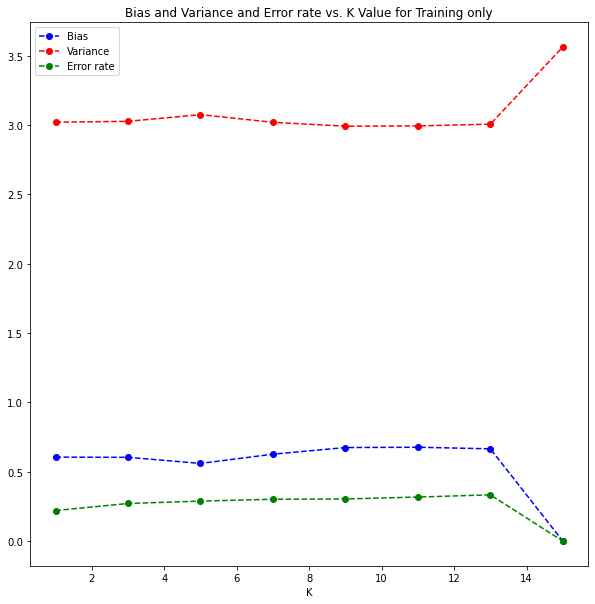

In [62]:
#ex 3.1.2 metrics and 3.1.3 train only
X_train = X
y_train = y
varianceTO = np.zeros(8)
biasTO = np.zeros(8)
error_rateTO = np.zeros(8)
f1TO = np.zeros(8)
precisionTO = np.zeros(8)
recallTO = np.zeros(8)

metrics_TO = pd.DataFrame(columns=["k","precision train","recall train","f1 train"])

for k in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_train)
    confusionTO_k, f1TO[int(np.floor(k/2)-1)], precisionTO[int(np.floor(k/2)-1)], recallTO[int(np.floor(k/2)-1)] = metricas_exactidao(y_train,pred)
    metrics_TO = metrics_TO.append({'k':k,"precision train":precisionTO[int(np.floor(k/2)-1)],"recall train":recallTO[int(np.floor(k/2)-1)],"f1 train":f1TO[int(np.floor(k/2)-1)]}, ignore_index=True)
    
    varianceTO[int(np.floor(k/2)-1)] = np.var(pred) # Where Prediction is a vector variable obtained post the # predict() function of any Classifier.
    SSE = np.mean((np.mean(pred) - y_train)** 2) # Where Y is your dependent variable. # SSE : Sum of squared errors.
    biasTO[int(np.floor(k/2)-1)] = SSE - varianceTO[int(np.floor(k/2)-1)]
    error_rateTO[int(np.floor(k/2)-1)] = np.mean(pred != y_train)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(range(1,16,2), biasTO,  color="blue", linestyle="dashed", marker="o", label='Bias')
ax.plot(range(1,16,2), varianceTO,  color="red", linestyle="dashed", marker="o", label = 'Variance')
ax.plot(range(1,16,2), error_rateTO,  color="green", linestyle="dashed", marker="o", label = 'Error rate')

plt.title('Bias and Variance and Error rate vs. K Value for Training only')
plt.xlabel('K')
plt.legend()
plt.savefig("3_1_3 Bias and Variance and Error rate vs K Value for Training only")

In [63]:
# ex 3.1.2 metrics and 3.1.3 train only
metrics_TO

,k,precision train,recall train,f1 train
0,1.0,1.000000,1.000000,1.000000
1,3.0,0.788996,0.779620,0.772477
2,5.0,0.728042,0.728804,0.717881
3,7.0,0.708029,0.711685,0.700732
4,9.0,0.692267,0.698370,0.684967
5,11.0,0.690234,0.696196,0.680912
6,13.0,0.672365,0.682337,0.665716
7,15.0,0.657011,0.666576,0.650609


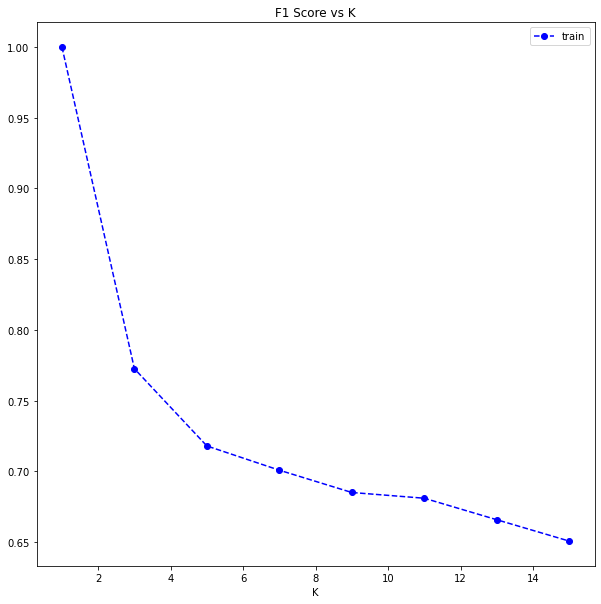

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(range(1,16,2), metrics_TO["f1 train"],  color="blue", linestyle="dashed", marker="o", label='train')

plt.title('F1 Score vs K')
plt.xlabel('K')
plt.legend()

plt.savefig("3_1_3 overfitting_vs_underfitting_TO")

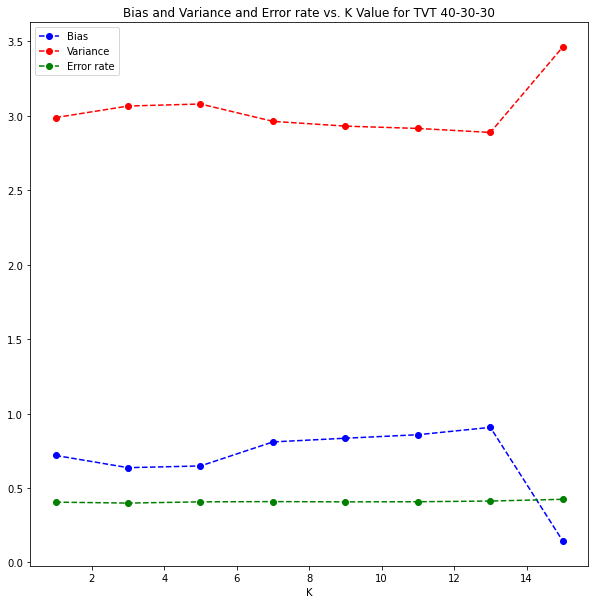

In [65]:
#ex 3.1.2 metrics and 3.1.3 validation and test
validation_size = 0.3
test_size = 0.3
X_train, X_val, X_test, y_train, y_val, y_test = data_splitting_TVT(X,y,validation_size,test_size)
varianceTVT = np.zeros(8)
biasTVT = np.zeros(8)
error_rateTVT = np.zeros(8)
val_accuracyTVT = np.zeros(8)

f1TVT_train = np.zeros(8)
precisionTVT_train = np.zeros(8)
recallTVT_train = np.zeros(8)

f1TVT_test = np.zeros(8)
precisionTVT_test = np.zeros(8)
recallTVT_test = np.zeros(8)

f1TVT_val = np.zeros(8)
precisionTVT_val = np.zeros(8)
recallTVT_val = np.zeros(8)

error_rate_trainTVT = np.zeros(8)
error_rate_valTVT = np.zeros(8)

metrics_TVT = pd.DataFrame(columns=['k',
                                "precision train",
                              "recall train",
                              "f1 train",
                              "precision val",
                              "recall val",
                              "f1 val",
                              "precision test",
                              "recall test",
                              "f1 test"])

for k in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train = knn.predict(X_train)
    error_rate_trainTVT[int(np.floor(k/2)-1)] = np.mean(train != y_train)
    val = knn.predict(X_val)
    error_rate_valTVT[int(np.floor(k/2)-1)] = np.mean(val != y_val)
    pred = knn.predict(X_test)
    
    confusionTO_k1_train, f1TVT_train[int(np.floor(k/2)-1)], precisionTVT_train[int(np.floor(k/2)-1)], recallTVT_train[int(np.floor(k/2)-1)] = metricas_exactidao(y_train,train)
    confusionTO_k1_val, f1TVT_val[int(np.floor(k/2)-1)], precisionTVT_val[int(np.floor(k/2)-1)], recallTVT_val[int(np.floor(k/2)-1)] = metricas_exactidao(y_val,val)
    confusionTO_k1_test, f1TVT_test[int(np.floor(k/2)-1)], precisionTVT_test[int(np.floor(k/2)-1)], recallTVT_test[int(np.floor(k/2)-1)] = metricas_exactidao(y_test,pred)
    
    varianceTVT[int(np.floor(k/2)-1)] = np.var(pred) # Where Prediction is a vector variable obtained post the # predict() function of any Classifier.
    SSE = np.mean((np.mean(pred) - y_test)** 2) # Where Y is your dependent variable. # SSE : Sum of squared errors.
    biasTVT[int(np.floor(k/2)-1)] = SSE - varianceTVT[int(np.floor(k/2)-1)]
    error_rateTVT[int(np.floor(k/2)-1)] = np.mean(pred != y_test)
    
    
    metrics_TVT = metrics_TVT.append({'k':k,
                              "precision train":precisionTVT_train[int(np.floor(k/2)-1)],
                              "recall train":recallTVT_train[int(np.floor(k/2)-1)],
                              "f1 train":f1TVT_train[int(np.floor(k/2)-1)],
                              "precision val":precisionTVT_val[int(np.floor(k/2)-1)],
                              "recall val":recallTVT_val[int(np.floor(k/2)-1)],
                              "f1 val":f1TVT_val[int(np.floor(k/2)-1)],
                              "precision test":precisionTVT_test[int(np.floor(k/2)-1)],
                              "recall test":recallTVT_test[int(np.floor(k/2)-1)],
                              "f1 test":f1TVT_test[int(np.floor(k/2)-1)]}, ignore_index=True)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(range(1,16,2), biasTVT,  color="blue", linestyle="dashed", marker="o", label='Bias')
ax.plot(range(1,16,2), varianceTVT,  color="red", linestyle="dashed", marker="o", label = 'Variance')
ax.plot(range(1,16,2), error_rateTVT,  color="green", linestyle="dashed", marker="o", label = 'Error rate')

plt.title('Bias and Variance and Error rate vs. K Value for TVT 40-30-30')
plt.xlabel('K')
plt.legend()

plt.savefig("3_1_3 Bias and Variance and Error rate vs K Value for TVT 40-30-30")

In [66]:
# ex 3.1.2 train test val metrics 
metrics_TVT

,k,precision train,recall train,f1 train,precision val,recall val,f1 val,precision test,recall test,f1 test
0,1.0,1.000000,1.000000,1.000000,0.603460,0.604167,0.603502,0.572380,0.576087,0.573342
1,3.0,0.754595,0.743886,0.736592,0.596782,0.606884,0.595222,0.573061,0.595109,0.577217
2,5.0,0.703733,0.708560,0.697417,0.599557,0.608696,0.599119,0.580040,0.601449,0.584317
3,7.0,0.690421,0.694973,0.683883,0.596211,0.603261,0.591993,0.571690,0.593297,0.574128
4,9.0,0.659921,0.669158,0.652620,0.595156,0.606884,0.593908,0.572565,0.591486,0.569386
5,11.0,0.651976,0.654212,0.638518,0.592935,0.602355,0.589395,0.571887,0.593297,0.570334
6,13.0,0.640366,0.648098,0.630017,0.584621,0.596014,0.580996,0.579442,0.592391,0.570337
7,15.0,0.623672,0.629076,0.609712,0.574219,0.588768,0.571721,0.582612,0.587862,0.565429


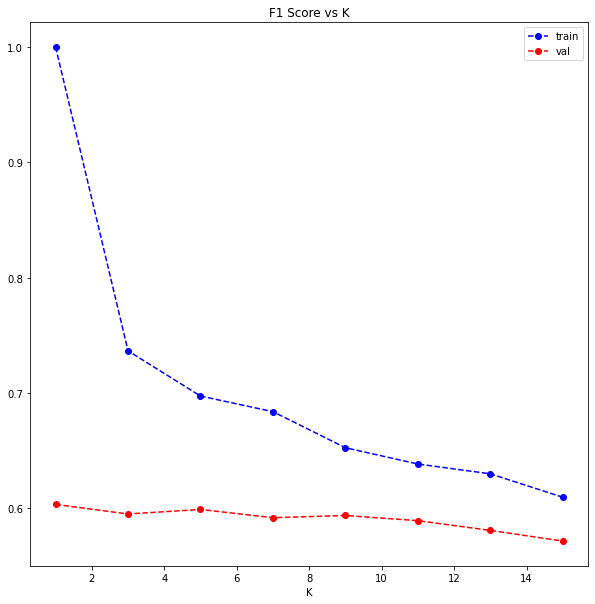

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(range(1,16,2), metrics_TVT["f1 train"],  color="blue", linestyle="dashed", marker="o", label='train')
ax.plot(range(1,16,2), metrics_TVT["f1 val"],  color="red", linestyle="dashed", marker="o", label='val')

plt.title('F1 Score vs K')
plt.xlabel('K')
plt.legend()

plt.savefig("3_1_3 overfitting_vs_underfitting_tvt")

In [68]:
# ex 3.1.2 train test validation division

data_distribution=pd.DataFrame(columns=["Setosa","Versicolor","Virginica"], index=["train","val","test"])

data_distribution=pd.DataFrame(columns=["1","2","3","4","5","6","7"], index=["train","val","test"])

data_distribution["1"][0]=y_train.value_counts()[1]
data_distribution["2"][0]=y_train.value_counts()[2]
data_distribution["3"][0]=y_train.value_counts()[3]
data_distribution["4"][0]=y_train.value_counts()[4]
data_distribution["5"][0]=y_train.value_counts()[5]
data_distribution["6"][0]=y_train.value_counts()[6]
data_distribution["7"][0]=y_train.value_counts()[7]

data_distribution["1"][1]=y_val.value_counts()[1]
data_distribution["2"][1]=y_val.value_counts()[2]
data_distribution["3"][1]=y_val.value_counts()[3]
data_distribution["4"][1]=y_val.value_counts()[4]
data_distribution["5"][1]=y_val.value_counts()[5]
data_distribution["6"][1]=y_val.value_counts()[6]
data_distribution["7"][1]=y_val.value_counts()[7]

data_distribution["1"][2]=y_test.value_counts()[1]
data_distribution["2"][2]=y_test.value_counts()[2]
data_distribution["3"][2]=y_test.value_counts()[3]
data_distribution["4"][2]=y_test.value_counts()[4]
data_distribution["5"][2]=y_test.value_counts()[5]
data_distribution["6"][2]=y_test.value_counts()[6]
data_distribution["7"][2]=y_test.value_counts()[7]

data_distribution

,1,2,3,4,5,6,7
train,289,180,176,270,281,186,90
val,245,118,117,209,218,135,62
test,254,120,111,219,211,124,65


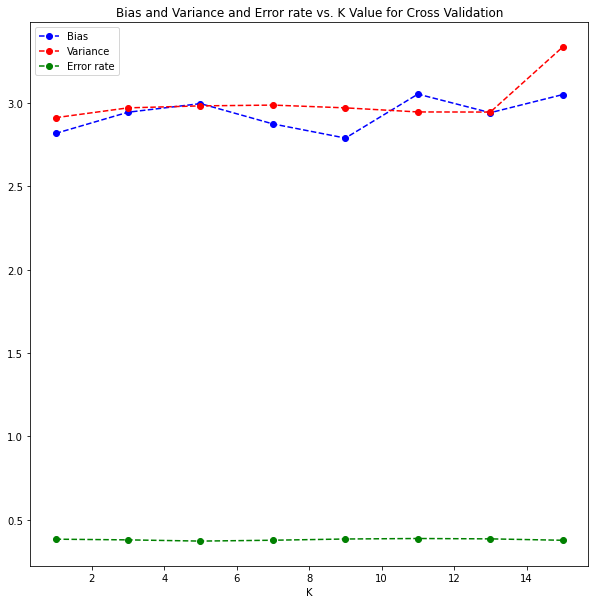

In [69]:
#ex 3.1.2 metrics and 3.1.3 cv
CV = 10
#Escolher um valor K
varianceCV = np.zeros(8)
biasCV = np.zeros(8)
error_rateCV = np.zeros(8)
f1CV = np.zeros(8)
precisionCV = np.zeros(8)
recallCV = np.zeros(8)

metrics_CV = pd.DataFrame(columns=['k',
                                "precision cv",
                              "recall cv",
                              "f1 cv"])

for k in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    precision_k = np.zeros(10)
    recall_k = np.zeros(10)
    f1_k = np.zeros(10)
    variance_k = np.zeros(10)
    bias_k = np.zeros(10)
    error_rate_k = np.zeros(10)
    conf_matrix_list_of_arrays = []
    kf = KFold(n_splits=CV,shuffle=True)
    X_array = X.values
    y_array = y.values
    i = 0;
    for train_index, test_index in kf.split(X_array): 
        X_train, X_test = X_array[train_index], X_array[test_index] 
        y_train, y_test = y_array[train_index], y_array[test_index] 
        knn.fit(X_train, y_train) 
        pred = knn.predict(X_test)
        conf_matrix, f1_k[i], precision_k[i], recall_k[i] = metricas_exactidao(y_test,pred)
        variance_k[i] = np.var(pred) # Where Prediction is a vector variable obtained post the # predict() function of any Classifier.
        
        
        
        
        SSE = np.mean((np.mean(pred) - y_test)** 2) # Where Y is your dependent variable. # SSE : Sum of squared errors.
        bias_k[i] = SSE - variance_k[i]
        error_rate_k[i] = np.mean(pred != y_test)
        conf_matrix_list_of_arrays.append(conf_matrix) 
        i += 1
    mean_of_conf_matrix_arrays = sum(conf_matrix_list_of_arrays)/len(conf_matrix_list_of_arrays)
    precisionCV[int(np.floor(k/2)-1)] = precision_k.mean()
    recallCV[int(np.floor(k/2)-1)] = recall_k.mean()
    f1CV[int(np.floor(k/2)-1)] = f1_k.mean()
    varianceCV[int(np.floor(k/2)-1)] = variance_k.mean()
    biasCV[int(np.floor(k/2)-1)] = SSE - bias_k.mean()
    error_rateCV[int(np.floor(k/2)-1)] = error_rate_k.mean()
    
    metrics_CV = metrics_CV.append({'k':k,"precision cv": precisionCV[int(np.floor(k/2)-1)],"recall cv":recallCV[int(np.floor(k/2)-1)],"f1 cv":f1CV[int(np.floor(k/2)-1)]}, ignore_index=True)
    

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(range(1,16,2), biasCV,  color="blue", linestyle="dashed", marker="o", label='Bias')
ax.plot(range(1,16,2), varianceCV,  color="red", linestyle="dashed", marker="o", label = 'Variance')
ax.plot(range(1,16,2), error_rateCV,  color="green", linestyle="dashed", marker="o", label = 'Error rate')

plt.title('Bias and Variance and Error rate vs. K Value for Cross Validation')
plt.xlabel('K')
plt.legend()

plt.savefig("3_1_3 Bias and Variance and Error rate vs K Value for Cross Validation")


In [70]:
# ex 3.1.2 cross validation metrics
metrics_CV

,k,precision cv,recall cv,f1 cv
0,1.0,0.621377,0.623098,0.619739
1,3.0,0.608421,0.616576,0.600781
2,5.0,0.610107,0.620652,0.605273
3,7.0,0.614802,0.627989,0.611417
4,9.0,0.612098,0.622826,0.606770
5,11.0,0.601164,0.615489,0.597276
6,13.0,0.599658,0.612500,0.594500
7,15.0,0.607571,0.614674,0.596645


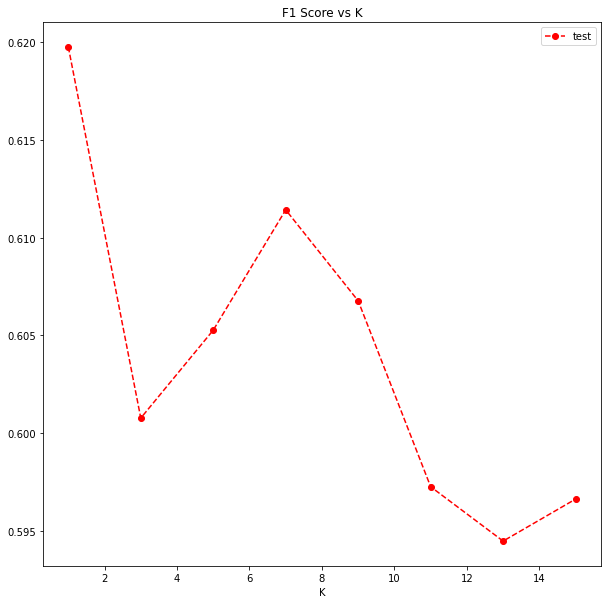

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.plot(range(1,16,2), metrics_CV["f1 cv"],  color="red", linestyle="dashed", marker="o", label='test')

plt.title('F1 Score vs K')
plt.xlabel('K')
plt.legend()

plt.savefig("3_1_3 overfitting_vs_underfitting_CV")

In [72]:
# ex 3.2.1
features_data = pd.read_csv("features_actividades_400.csv")
features_data["activity"].value_counts()
features = features_data["activity"].unique()
for f in range(0, len(features)):
    feature = features[f]
    if features_data["activity"].value_counts()[feature] / len(features_data["activity"]) < 0.05:
        features_data = features_data[features_data["activity"] != feature].reset_index(drop=True)
y = features_data["activity"]
X = features_data.drop(["activity","Unnamed: 0"],axis=1)

In [74]:
# ex 3.2.1 best model

param_grid = {'k':[1,3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
param_features_test = pd.DataFrame(columns=["num_features","k","weights","metric","f1 train","f1 test"])

for i in range(1,55):
    X_selected = select_features_ReliefF(X,y,i,n_neighbors=10)  
    X_train, X_test, y_train, y_test = data_splitting_TT(X_selected,y,0.3)
    for k in param_grid['k']:
        for w in param_grid['weights']:
            for m in param_grid['metric']:
                knn = KNeighborsClassifier(n_neighbors=k)
        
                knn.fit(X_train, y_train) 
                pred = knn.predict(X_test)
                train=knn.predict(X_train)
                _, f1_test, precision_test,_ = metricas_exactidao(y_test,pred)
                _, f1_train, precision_train,_ = metricas_exactidao(y_train,train)

                param_features_test = param_features_test.append({'num_features':i,
                                                                  'k': k,'weights':w,'metric':m,
                                                                  'f1 train':f1_train,'f1 test':f1_test}, ignore_index=True)

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metr

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metr

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metr

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metr

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metr

In [75]:
# ex 3.2.1 best model
param_features_test.sort_values(by="f1 test",ascending=False)

,num_features,k,weights,metric,f1 train,f1 test
748,24,7,uniform,euclidean,0.866040,0.810386
751,24,7,distance,manhattan,0.866040,0.810386
750,24,7,distance,euclidean,0.866040,0.810386
749,24,7,uniform,manhattan,0.866040,0.810386
716,23,7,uniform,euclidean,0.863690,0.809349
...,...,...,...,...,...,...
14,1,7,distance,euclidean,0.436638,0.344245
15,1,7,distance,manhattan,0.436638,0.344245
108,4,7,uniform,euclidean,0.436638,0.344245
45,2,7,uniform,manhattan,0.436638,0.344245


In [76]:
#Fisher
features_data=features_data.drop(["Unnamed: 0"],axis=1)
data_score, fisher_selected_features = select_features_Fisher(features_data,10)
fisher_selected_features

,acc_y_rms,acc_z_rms,acc_z_mean,acc_z_zero_crossings,acc_x_zero_crossings,acc_z_median,acc_y_median,acc_y_mean_crossings,acc_y_zero_crossings,acc_x_median
0,3445.316354,828.662695,484.42925,384.974428,377.064423,251.063503,158.588955,155.049654,79.039452,32.966205


In [77]:
# ex 3.2.1 features for the best model
selected_features = select_features_ReliefF(X,y,12,n_neighbors=10).columns
selected_features

Index(['acc_z_zero_crossings', 'acc_x_corr_acc_x', 'acc_x_zero_crossings',
       'acc_y_zero_crossings', 'acc_y_mean_crossings', 'acc_y_median',
       'acc_x_mean_crossings', 'acc_z_mean_crossings', 'acc_z_median',
       'acc_x_median'],
      dtype='object')

In [78]:
# ex 3.2.3
param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
param_features_val = pd.DataFrame(columns=["num_features","n_neighbors","weights","metric","precision train","f1 train",
                                          "precision val","f1 val","precision test","f1 test"])

validation_size = 0.3
test_size = 0.3

for i in range(1,55):
    X_selected = select_features_ReliefF(X,y,i,n_neighbors=10)        
    X_train, X_val, X_test, y_train, y_val, y_test = data_splitting_TVT(X_selected,y,validation_size,test_size)
    for k in param_grid['n_neighbors']:
        for w in param_grid['weights']:
            for m in param_grid['metric']:
                knn = KNeighborsClassifier(n_neighbors=k)
                knn.fit(X_train, y_train) 
                train = knn.predict(X_train)
                val = knn.predict(X_val)
                test = knn.predict(X_test)
                
                _, f1_train, precision_train, _ = metricas_exactidao(y_train,train)
                _, f1_val, precision_val, _ = metricas_exactidao(y_val,val)
                _, f1_test, precision_test, _ = metricas_exactidao(y_test,test)
 
                param_features_val = param_features_val.append({'num_features':i,'n_neighbors': k,'weights':w,'metric':m,
                                                                'f1 train':f1_train,'precision train':precision_train,
                                                               'f1 val':f1_val,'precision val':precision_val,
                                                               'f1 test':f1_test,'precision test':precision_test}, ignore_index=True)
    
   


C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metr

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metr

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metr

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metr

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\metr

In [79]:
# ex 3.2.3 and 3.2.4 all features and best features
param_features_val.sort_values(by="f1 val",ascending=False)

,num_features,n_neighbors,weights,metric,precision train,f1 train,precision val,f1 val,precision test,f1 test
712,23,5,uniform,euclidean,0.855608,0.854322,0.788736,0.788127,0.787230,0.783276
713,23,5,uniform,manhattan,0.855608,0.854322,0.788736,0.788127,0.787230,0.783276
714,23,5,distance,euclidean,0.855608,0.854322,0.788736,0.788127,0.787230,0.783276
715,23,5,distance,manhattan,0.855608,0.854322,0.788736,0.788127,0.787230,0.783276
744,24,5,uniform,euclidean,0.856395,0.854968,0.785083,0.784723,0.791425,0.786967
...,...,...,...,...,...,...,...,...,...,...
51,2,9,distance,manhattan,0.338292,0.341803,0.252791,0.272104,0.289337,0.313895
112,4,9,uniform,euclidean,0.338292,0.341803,0.252791,0.272104,0.289337,0.313895
80,3,9,uniform,euclidean,0.338292,0.341803,0.252791,0.272104,0.289337,0.313895
81,3,9,uniform,manhattan,0.338292,0.341803,0.252791,0.272104,0.289337,0.313895


In [80]:
# ex 3.2.3 features for the best model
selected_features = select_features_ReliefF(X,y,23,n_neighbors=10).columns
selected_features

Index(['acc_z_zero_crossings', 'acc_x_corr_acc_x', 'acc_x_zero_crossings',
       'acc_y_zero_crossings', 'acc_y_mean_crossings', 'acc_y_median',
       'acc_x_mean_crossings', 'acc_z_mean_crossings', 'acc_z_median',
       'acc_x_median', 'acc_x_interq_range', 'acc_y_interq_range',
       'acc_z_interq_range', 'acc_y_rms', 'acc_x_rms', 'acc_y_mean',
       'acc_z_mean', 'acc_z_kurtosis', 'acc_x_std', 'acc_y_std', 'acc_z_std'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

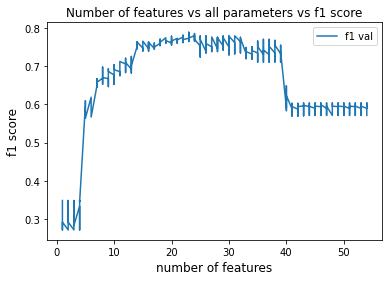

In [81]:
# 3.2.2
plt.figure()
param_features_val.sort_values(by="num_features").plot(x="num_features",y="f1 val")

plt.title('Number of features vs all parameters vs f1 score')
plt.ylabel('f1 score',size=12)
plt.xlabel('number of features',size=12)
plt.legend()

plt.savefig("3_2_2 Number of features vs all parameters vs f1 score")

In [82]:
# ex 4 dataset
features_data = pd.read_csv("features_actividades_400.csv")
features_data["activity"].value_counts()
features = features_data["activity"].unique()
for f in range(0, len(features)):
    feature = features[f]
    if features_data["activity"].value_counts()[feature] / len(features_data["activity"]) < 0.05:
        features_data = features_data[features_data["activity"] != feature].reset_index(drop=True)
y = features_data["activity"]
X = features_data.drop(["activity","Unnamed: 0"],axis=1)

validation_size = 0.3
test_size = 0.3
X_selected = select_features_ReliefF(X,y,23,n_neighbors=10)        
X_train, X_val, X_test, y_train, y_val, y_test = data_splitting_TVT(X_selected,y,validation_size,test_size)

In [83]:
# ex 4 parameters
neurons_number = [20,30,40,50,100,150,200]
learning_rate = [0.01,0.001,0.0001]
hidden_layers = [1,5,10]
learning_rate_type = ['constant','invscaling','adaptive']
momentum_1 = [0,0.5,0.8,1]

In [84]:
# ex 4 learning rate

results_MLP_1 = pd.DataFrame(columns=['neurons','hidden layers','learning rate','Train precision','Val precision','Test precision'])

for neurons in range(0,len(neurons_number)):
    for learning in range(0,len(learning_rate)):
        for layers in range(0,len(hidden_layers)):
            
            clf = MLPClassifier(solver='sgd', batch_size=500, alpha=1e-5,hidden_layer_sizes=(neurons_number[neurons],hidden_layers[layers]), random_state=1, activation = 'logistic', learning_rate_init = learning_rate[learning], max_iter = 1000)
        
            clf.fit(X_train, y_train)
            y_val_pred = clf.predict(X_val)
            precision_val = precision_score(y_val, y_val_pred, average='micro')
            clf.score(X_val,y_val)
        
            y_test_pred = clf.predict(X_test)
            precision_test = precision_score(y_test, y_test_pred, average='micro')
            clf.score(X_test,y_test)
        
            y_train_pred = clf.predict(X_train)
            precision_train = precision_score(y_train, y_train_pred, average='micro')
            clf.score(X_train,y_train)
        
            results_MLP_1 = results_MLP_1.append({'neurons':neurons_number[neurons],'hidden layers':hidden_layers[layers],'learning rate':learning_rate[learning],'Train precision':precision_train,'Val precision':precision_val,'Test precision':precision_test}, ignore_index=True)
        

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\neural_network\_m

In [85]:
# ex 4.1 learning rate and hidden layers
data = results_MLP_1.sort_values(by="Val precision",ascending=False)
data

,neurons,hidden layers,learning rate,Train precision,Val precision,Test precision
47,150.0,10.0,0.0100,0.746603,0.743659,0.736413
38,100.0,10.0,0.0100,0.752038,0.739130,0.738225
56,200.0,10.0,0.0100,0.751359,0.735507,0.729167
29,50.0,10.0,0.0100,0.737092,0.735507,0.731884
37,100.0,5.0,0.0100,0.752038,0.725543,0.733696
...,...,...,...,...,...,...
14,30.0,10.0,0.0010,0.119565,0.134058,0.139493
33,50.0,1.0,0.0001,0.122283,0.106884,0.108696
60,200.0,1.0,0.0001,0.119565,0.105978,0.100543
24,40.0,1.0,0.0001,0.062500,0.059783,0.064312


In [86]:
# ex 4.1 learning rate and hidden layers
data[data["hidden layers"]==1].head(15)

,neurons,hidden layers,learning rate,Train precision,Val precision,Test precision
9,30.0,1.0,0.0100,0.318614,0.329710,0.338768
45,150.0,1.0,0.0100,0.318614,0.328804,0.338768
36,100.0,1.0,0.0100,0.318614,0.328804,0.338768
54,200.0,1.0,0.0100,0.318614,0.328804,0.338768
0,20.0,1.0,0.0100,0.318614,0.327899,0.338768
57,200.0,1.0,0.0010,0.316576,0.326087,0.330616
3,20.0,1.0,0.0010,0.313179,0.323370,0.327899
6,20.0,1.0,0.0001,0.308424,0.319746,0.318841
48,150.0,1.0,0.0010,0.314538,0.307065,0.303442
30,50.0,1.0,0.0010,0.196332,0.221920,0.230072


In [ ]:
# ex 4.2 variable learning rate

results_MLP_2 = pd.DataFrame(columns=['neurons','hidden layers','learning type','Train precision','Val precision','Test precision'])
for neurons in range(0,len(neurons_number)):
    for type_l in range(0,len(learning_rate_type)):
        for layers in range(0,len(hidden_layers)):
            
            clf = MLPClassifier(solver='sgd', batch_size=500, alpha=1e-5,hidden_layer_sizes=(neurons_number[neurons],hidden_layers[layers]), random_state=1, activation = 'logistic', learning_rate = learning_rate_type[type_l], learning_rate_init = learning_rate[0],max_iter = 1000)
        
            clf.fit(X_train, y_train)
            y_val_pred = clf.predict(X_val)
            precision_val = precision_score(y_val, y_val_pred, average='micro')
            clf.score(X_val,y_val)
        
            y_test_pred = clf.predict(X_test)
            precision_test = precision_score(y_test, y_test_pred, average='micro')
            clf.score(X_test,y_test)
        
            y_train_pred = clf.predict(X_train)
            precision_train = precision_score(y_train, y_train_pred, average='micro')
            clf.score(X_train,y_train)
        
        
            results_MLP_2 = results_MLP_2.append({'neurons':neurons_number[neurons],'hidden layers':hidden_layers[layers],'learning type':learning_rate_type[type_l],'Train precision':precision_train,'Val precision':precision_val,'Test precision':precision_test}, ignore_index=True)


C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\neural_network\_m

In [162]:
# ex 4.2 variable learning rate and hidden layers
data = results_MLP_2.sort_values(by="Val precision",ascending=False)
data

NameError: name 'results_MLP_2' is not defined

In [540]:
# ex 4.2 variable learning rate 
data[data["hidden layers"]==1].head(15)

,neurons,hidden layers,learning type,Train precision,Val precision,Test precision
15,30,1,adaptive,0.318614,0.329710,0.338768
9,30,1,constant,0.318614,0.329710,0.338768
42,100,1,adaptive,0.318614,0.328804,0.338768
60,200,1,adaptive,0.318614,0.328804,0.338768
45,150,1,constant,0.318614,0.328804,0.338768
36,100,1,constant,0.318614,0.328804,0.338768
54,200,1,constant,0.318614,0.328804,0.338768
51,150,1,adaptive,0.318614,0.328804,0.338768
0,20,1,constant,0.318614,0.327899,0.338768
6,20,1,adaptive,0.318614,0.327899,0.338768


In [159]:
# ex 4.3 momentum

results_MLP_3 = pd.DataFrame(columns=['neurons','hidden layers','momentum','Train precision','Val precision','Test precision'])
for neurons in range(0,len(neurons_number)):
    for m in range(0,len(momentum_1)):
        for layers in range(0,len(hidden_layers)):
        
            clf = MLPClassifier(solver='sgd', batch_size=500, alpha=1e-5,hidden_layer_sizes=(neurons_number[neurons],hidden_layers[layers]), random_state=1, activation = 'logistic', momentum = momentum_1[m],max_iter = 1000, learning_rate_init = learning_rate[0])
            
            clf.fit(X_train, y_train)
            y_val_pred = clf.predict(X_val)
            precision_val = precision_score(y_val, y_val_pred, average='micro')
            clf.score(X_val,y_val)
        
            y_test_pred = clf.predict(X_test)
            precision_test = precision_score(y_test, y_test_pred, average='micro')
            clf.score(X_test,y_test)
        
            y_train_pred = clf.predict(X_train)
            precision_train = precision_score(y_train, y_train_pred, average='micro')
            clf.score(X_train,y_train)
            
        
            results_MLP_3 = results_MLP_3.append({'neurons':neurons_number[neurons],'hidden layers':hidden_layers[layers],'momentum':momentum_1[m],'Train precision':precision_train,'Val precision':precision_val,'Test precision':precision_test}, ignore_index=True)
         

NameError: name 'neurons_number' is not defined

In [600]:
# ex 4.3 momentum and hidden layers
data = results_MLP_3.sort_values(by="Val precision",ascending=False)
data

,neurons,hidden layers,momentum,Train precision,Val precision,Test precision
83,200.0,10.0,1.0,0.768342,0.747283,0.743659
82,200.0,5.0,1.0,0.651495,0.644022,0.656703
56,100.0,10.0,0.8,0.622283,0.613225,0.598732
70,150.0,5.0,1.0,0.612092,0.612319,0.615942
79,200.0,5.0,0.8,0.597826,0.602355,0.599638
...,...,...,...,...,...,...
81,200.0,1.0,1.0,0.190897,0.197464,0.191123
57,100.0,1.0,1.0,0.190897,0.197464,0.191123
21,30.0,1.0,1.0,0.183424,0.189312,0.198370
48,100.0,1.0,0.0,0.183424,0.189312,0.198370


In [562]:
# ex 4.3 momentum
data[data["hidden layers"]==1].head(15)

,neurons,hidden layers,momentum,Train precision,Val precision,Test precision
18,30.0,1.0,0.8,0.318614,0.329710,0.338768
75,200.0,1.0,0.5,0.318614,0.328804,0.338768
54,100.0,1.0,0.8,0.318614,0.328804,0.338768
78,200.0,1.0,0.8,0.318614,0.328804,0.338768
66,150.0,1.0,0.8,0.318614,0.328804,0.338768
63,150.0,1.0,0.5,0.318614,0.328804,0.338768
6,20.0,1.0,0.8,0.318614,0.327899,0.338768
3,20.0,1.0,0.5,0.316576,0.327899,0.337862
72,200.0,1.0,0.0,0.316576,0.326087,0.330616
51,100.0,1.0,0.5,0.315897,0.326087,0.330616


In [549]:
# ex 5 dataset
features_data = pd.read_csv("features_actividades_400.csv")
features_data["activity"].value_counts()
features = features_data["activity"].unique()
for f in range(0, len(features)):
    feature = features[f]
    if features_data["activity"].value_counts()[feature] / len(features_data["activity"]) < 0.05:
        features_data = features_data[features_data["activity"] != feature].reset_index(drop=True)
y = features_data["activity"]
X = features_data.drop(["activity","Unnamed: 0"],axis=1)

validation_size = 0.3
test_size = 0.3
X_selected = select_features_ReliefF(X,y,23,n_neighbors=10)        
X_train, X_val, X_test, y_train, y_val, y_test = data_splitting_TVT(X_selected,y,validation_size,test_size)

In [20]:
# ex 5 dataset
one_hot_labels=pd.get_dummies(y_train).values
feature_set=X_train.values

In [21]:
feature_set

array([[ 3.12226196,  9.41132208,  2.16009254, ...,  0.26328442,
         0.2717138 ,  8.88700135],
       [ 3.37835153,  2.91721493,  8.05094733, ...,  2.55708455,
         2.39314839,  0.34577688],
       [ 2.13714447,  8.14106295,  2.59423715, ...,  2.08611348,
         2.32606003, 46.53335622],
       ...,
       [ 2.1004782 ,  8.10159553,  2.4779967 , ...,  2.31847107,
         2.57174418, 65.74310759],
       [ 1.90056561,  7.52775556,  2.26531264, ...,  1.66494457,
         1.90318544,  0.85483568],
       [ 3.12290886,  8.84221489,  2.70023002, ...,  1.23906609,
         1.18568799, 41.95840181]])

In [155]:
# ex 5 mlp

# https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/

hidden_nodes = [20,30,40,50,100,150,200]
lr = [0.01,0.001,0.0001]

np.random.seed(42)

results = pd.DataFrame(columns=['neurons','learning rate','Train precision','Val precision','Test precision'])

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

for neurons in range(0,len(hidden_nodes)):
    for learning in range(0,len(lr)):

        instances = feature_set.shape[0]
        attributes = feature_set.shape[1]

        output_labels = 7

        wh = np.random.rand(attributes,hidden_nodes[neurons])
        bh = np.random.randn(hidden_nodes[neurons])

        wo = np.random.rand(hidden_nodes[neurons],output_labels)
        bo = np.random.randn(output_labels)

        error_cost = []

        for epoch in range(1000):
            ############# feedforward

            # Phase 1
            zh = np.dot(feature_set, wh) + bh
            ah = sigmoid(zh)

            # Phase 2
            zo = np.dot(ah, wo) + bo
            ao = softmax(zo)
            
            ########## Back Propagation

            ########## Phase 1

            dcost_dzo = ao - one_hot_labels
            dzo_dwo = ah

            dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

            dcost_bo = dcost_dzo

            ########## Phases 2

            dzo_dah = wo
            dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
            dah_dzh = sigmoid_der(zh)
            dzh_dwh = feature_set
            dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

            dcost_bh = dcost_dah * dah_dzh

            # Update Weights ================

            wh -= lr[learning] * dcost_wh
            bh -= lr[learning] * dcost_bh.sum(axis=0)

            wo -= lr[learning] * dcost_wo
            bo -= lr[learning] * dcost_bo.sum(axis=0)

            if epoch % 200 == 0:
                loss = np.sum(-one_hot_labels * np.log(ao))
                error_cost.append(loss)
                
            ############### Predict
            # 2.1: Feed forward
            zh = np.dot(X_train.values, wh) + bh
            ah = sigmoid(zh)
            # Phase 2
            zo = np.dot(ah, wo) + bo
            ao = softmax(zo)  # Output of the Output layer
            y_train_pred=pd.Series(np.argmax(ao,axis=1)+1)
            precision_train = precision_score(y_train, pd.Series(y_train_pred), average='micro')
            
            # 2.1: Feed forward
            zh = np.dot(X_val.values, wh) + bh
            ah = sigmoid(zh)
            # Phase 2
            zo = np.dot(ah, wo) + bo
            ao = softmax(zo)  # Output of the Output layer
            y_val_pred=pd.Series(np.argmax(ao,axis=1)+1)
            precision_val = precision_score(y_val, pd.Series(y_val_pred), average='micro')
    
            # 2.1: Feed forward
            zh = np.dot(X_test.values, wh) + bh
            ah = sigmoid(zh)
            # Phase 2
            zo = np.dot(ah, wo) + bo
            ao = softmax(zo)  # Output of the Output layer
            y_test_pred=pd.Series(np.argmax(ao,axis=1)+1)
            precision_test = precision_score(y_test, pd.Series(y_test_pred), average='micro')
            
        results = results.append({'neurons':hidden_nodes[neurons],'learning rate':lr[learning],'Train precision':precision_train,'Val precision':precision_val,'Test precision':precision_test}, ignore_index=True)

In [156]:
# ex 5 mlp results
results.sort_values(by="Val precision",ascending=False).head(15)

,neurons,learning rate,Train precision,Val precision,Test precision
2,20.0,0.0001,0.333333,0.377778,0.288889
5,30.0,0.0001,0.333333,0.377778,0.288889
8,40.0,0.0001,0.333333,0.377778,0.288889
11,50.0,0.0001,0.333333,0.377778,0.288889
20,200.0,0.0001,0.016667,0.044444,0.022222
9,50.0,0.0100,0.033333,0.022222,0.000000
15,150.0,0.0100,0.033333,0.022222,0.000000
13,100.0,0.0010,0.000000,0.000000,0.000000
19,200.0,0.0010,0.000000,0.000000,0.000000
18,200.0,0.0100,0.000000,0.000000,0.000000


In [22]:
# ex 5 best mlp

# https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/

hidden_nodes = [150]
lr = [0.001]

np.random.seed(42)

results_loss = pd.DataFrame(columns=['Train precision','Val precision','Test precision'])

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

for neurons in range(0,len(hidden_nodes)):
    for learning in range(0,len(lr)):

        instances = feature_set.shape[0]
        attributes = feature_set.shape[1]

        output_labels = 7

        wh = np.random.rand(attributes,hidden_nodes[neurons])
        bh = np.random.randn(hidden_nodes[neurons])

        wo = np.random.rand(hidden_nodes[neurons],output_labels)
        bo = np.random.randn(output_labels)

        error_cost = []

        for epoch in range(1000):
            ############# feedforward

            # Phase 1
            zh = np.dot(feature_set, wh) + bh
            ah = sigmoid(zh)

            # Phase 2
            zo = np.dot(ah, wo) + bo
            ao = softmax(zo)
            
            ########## Back Propagation

            ########## Phase 1

            dcost_dzo = ao - one_hot_labels
            dzo_dwo = ah

            dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

            dcost_bo = dcost_dzo

            ########## Phases 2

            dzo_dah = wo
            dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
            dah_dzh = sigmoid_der(zh)
            dzh_dwh = feature_set
            dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

            dcost_bh = dcost_dah * dah_dzh

            # Update Weights ================

            wh -= lr[learning] * dcost_wh
            bh -= lr[learning] * dcost_bh.sum(axis=0)

            wo -= lr[learning] * dcost_wo
            bo -= lr[learning] * dcost_bo.sum(axis=0)

            #if epoch % 500 == 0:
            loss = np.sum(-one_hot_labels * np.log(ao))
            error_cost.append(loss)
                
            ############### Predict
            # 2.1: Feed forward
            zh = np.dot(X_train.values, wh) + bh
            ah = sigmoid(zh)
            # Phase 2
            zo = np.dot(ah, wo) + bo
            ao = softmax(zo)  # Output of the Output layer
            y_train_pred=pd.Series(np.argmax(ao,axis=1)+1)
            precision_train = precision_score(y_train, pd.Series(y_train_pred), average='micro')
            
            # 2.1: Feed forward
            zh = np.dot(X_val.values, wh) + bh
            ah = sigmoid(zh)
            # Phase 2
            zo = np.dot(ah, wo) + bo
            ao = softmax(zo)  # Output of the Output layer
            y_val_pred=pd.Series(np.argmax(ao,axis=1)+1)
            precision_val = precision_score(y_val, pd.Series(y_val_pred), average='micro')
    
            # 2.1: Feed forward
            zh = np.dot(X_test.values, wh) + bh
            ah = sigmoid(zh)
            # Phase 2
            zo = np.dot(ah, wo) + bo
            ao = softmax(zo)  # Output of the Output layer
            y_test_pred=pd.Series(np.argmax(ao,axis=1)+1)
            precision_test = precision_score(y_test, pd.Series(y_test_pred), average='micro')
            
            results_loss = results_loss.append({'Train precision':precision_train,'Val precision':precision_val,'Test precision':precision_test,'loss':abs(loss)}, ignore_index=True)
        

In [23]:
# ex 5 best mlp by epoch

results_loss

,Train precision,Val precision,Test precision,loss
0,0.196332,0.221920,0.230072,1.867163e+06
1,0.122283,0.106884,0.108696,1.638601e+07
2,0.119565,0.105978,0.100543,2.435083e+07
3,0.126359,0.122283,0.112319,2.830593e+07
4,0.183424,0.189312,0.198370,3.326657e+07
...,...,...,...,...
995,0.126359,0.122283,0.112319,3.278260e+07
996,0.183424,0.189312,0.198370,2.959558e+07
997,0.119565,0.105978,0.100543,3.322797e+07
998,0.190897,0.197464,0.191123,3.818058e+07


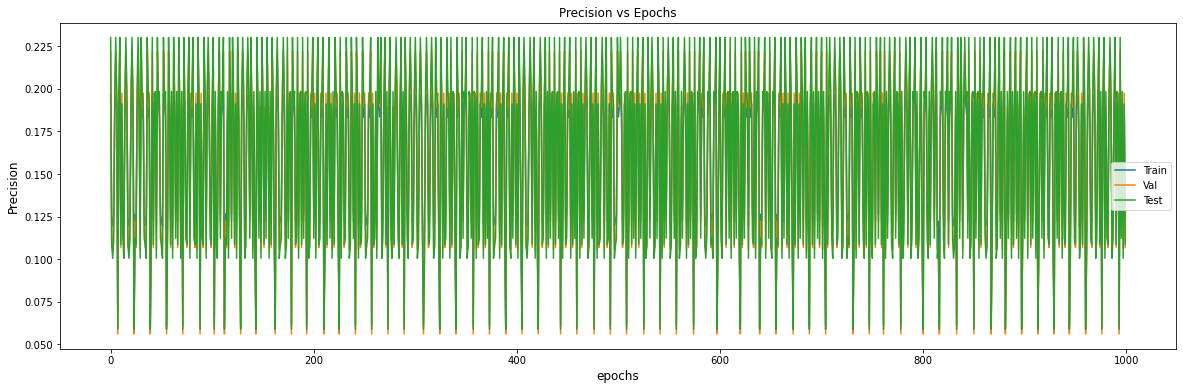

In [24]:
# ex 5 best mlp by epoch

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))

sns.lineplot(data=results_loss,y="Train precision",x=results_loss.index,label="Train")
sns.lineplot(data=results_loss,y="Val precision",x=results_loss.index,label="Val")
sns.lineplot(data=results_loss,y="Test precision",x=results_loss.index,label="Test")
#sns.lineplot(data=results_loss,y="loss",x=results_loss.index,label="Train precision")

plt.title('Precision vs Epochs')
plt.ylabel('Precision',size=12)
plt.xlabel('epochs',size=12)
plt.legend()

plt.savefig("Precision vs Epochs")

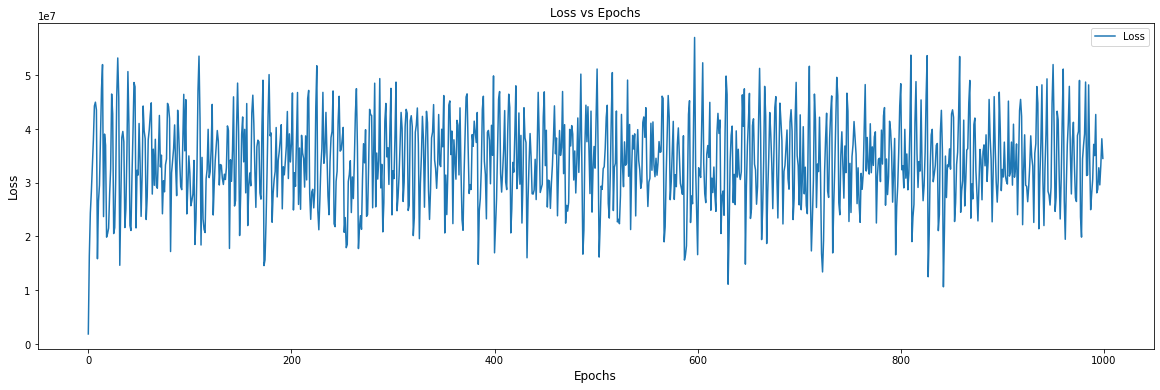

In [25]:
# ex 5 best mlp by epoch

#https://stackoverflow.com/questions/59260861/why-is-my-loss-function-return-negative-values
#https://gombru.github.io/2018/05/23/cross_entropy_loss/

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))

sns.lineplot(data=results_loss,y="loss",x=results_loss.index,label="Loss")

plt.title('Loss vs Epochs')
plt.ylabel('Loss',size=12)
plt.xlabel('Epochs',size=12)
plt.legend()

plt.savefig("Loss vs Epochs")